# Uber Business Problem
## Uber is facing - driver cancellation and non-availability of cars leading to loss of potential revenue.
The aim of the analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation. As a result of your analysis, you should be able to present to the client the root cause(s) and possible hypotheses of the problem(s) and recommend ways to improve them.

#### Import all necessary modules

In [1]:
## Import all the needed modules
import io
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import altair as alt
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
from itertools import cycle, islice

In [3]:
# Reading the dataset in to a dataframe df
df = pd.read_csv("Uber Request Data.csv")

In [4]:
## Printing top 5 rows
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [5]:
# Let's look at the type for each column and understand the formatting we need to perform
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


#### <font color='green'>Formatting - Converting Request id and Driver id type to String</font>

In [6]:
# Request id showed up as int64. Let's convert it to type String
df["Request id"] = df["Request id"].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   object 
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), object(5)
memory usage: 316.3+ KB


In [7]:
# Lets convert Driver id also to type String and format "nan" to pd.NA
df["Driver id"] = df["Driver id"].astype(str)

df["Driver id"][df["Driver id"] =="nan"] = pd.NA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Request id         6745 non-null   object
 1   Pickup point       6745 non-null   object
 2   Driver id          4095 non-null   object
 3   Status             6745 non-null   object
 4   Request timestamp  6745 non-null   object
 5   Drop timestamp     2831 non-null   object
dtypes: object(6)
memory usage: 316.3+ KB


#### <font color='green'>Formatting Date/Time Columns - Request timestamp and Drop Timestamp</font>

In [8]:
# There are different date formats for both Request Timestamp and Drop timestamp as evident from the output below
df[["Request timestamp","Drop timestamp"]].head(20)

,Request timestamp,Drop timestamp
0,11/7/2016 11:51,11/7/2016 13:00
1,11/7/2016 17:57,11/7/2016 18:47
2,12/7/2016 9:17,12/7/2016 9:58
3,12/7/2016 21:08,12/7/2016 22:03
4,13-07-2016 08:33:16,13-07-2016 09:25:47
5,13-07-2016 21:57:28,13-07-2016 22:28:59
6,14-07-2016 06:15:32,14-07-2016 07:13:15
7,15-07-2016 05:11:52,15-07-2016 06:07:52
8,15-07-2016 17:57:27,15-07-2016 18:50:51
9,11/7/2016 6:46,11/7/2016 7:25


##### <font color='green'>Formatting - Both columns have dates in different formats. Writing a Python function and then using the apply function to format these columns</font>

In [9]:
#### convert_time to format the date columns. This function will format all the dates accordingly
def convert_time(x):
    x = str(x)
    if len(x) in [15.0,14.0]:
        x = datetime.strptime(x,"%d/%m/%Y %H:%M")
    elif len(x) in [19.0]:
        x = datetime.strptime(x,"%d-%m-%Y %H:%M:%S")
    else:
        x = None
    x = pd.to_datetime(x)
    return x

In [10]:
# Lets apply the convert_time function to both the columns
df["Drop timestamp"] = df["Drop timestamp"].apply(convert_time)
df["Request timestamp"] = df["Request timestamp"].apply(convert_time)

In [11]:
# Lets check the type of both these columns now
df["Request timestamp"].dtype, df["Drop timestamp"].dtype

(dtype('<M8[ns]'), dtype('<M8[ns]'))

#### <font color='red'>Adding 4 Columns RequestYear, RequestMonth, DropYear, DropMonth</font>

In [12]:
# Add these 4 columns for year and month and ensure they are of Integer format
df["RequestYear"] = pd.to_datetime(df["Request timestamp"]).dt.year
df["RequestMonth"] = pd.to_datetime(df["Request timestamp"]).dt.month

df["DropYear"] = pd.to_datetime(df["Drop timestamp"]).dt.year.astype("Int64")
df["DropMonth"] = pd.to_datetime(df["Drop timestamp"]).dt.month.astype("Int64")

In [13]:
# Lets print the head to ensure we are seeing correct values for the Request Year/Month and Drop Year/Month columns
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestYear,RequestMonth,DropYear,DropMonth
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7


#### <font color='red'>Adding a column to show the Duration of each trip </font>

In [14]:
# Let's calculate the duration of each trip
df["Duration"] = df["Drop timestamp"] - df["Request timestamp"]
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestYear,RequestMonth,DropYear,DropMonth,Duration
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7,0 days 01:09:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7,0 days 00:50:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7,0 days 00:41:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7,0 days 00:55:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7,0 days 00:52:31


In [15]:
df.Duration.sort_values(ascending=False).head()

746    0 days 01:23:00
535    0 days 01:22:54
2104   0 days 01:22:04
1214   0 days 01:21:11
2592   0 days 01:21:07
Name: Duration, dtype: timedelta64[ns]

In [16]:
# Lets format the Duration to show up in minutes and format it as type Float
df.Duration = df.Duration.dt.total_seconds().div(60).astype("Float64")

In [17]:
# Using the describe method to understand the Duration Column where it is not null, reveals the min,mean,median,max of the Duration
df.Duration[~df.Duration.isna()].describe()
# Longest duration is arounf 83 minutes
# Minimum duration is of 20.78 minutes

count    2831.000000
mean       52.413753
std        13.850693
min        20.783333
25%        41.000000
50%        52.083333
75%        64.000000
max        83.000000
Name: Duration, dtype: float64

#### <font color='blue'>Observation - </font>
##### All trips have completed in less than a day. With the longest trip being for 01 Hour 23 Minutes

#### <font color='red'>Adding a column to identify the trips that completed on the same day. The Column name will be SameDay</font>

In [18]:
# Let's add a column SameDay to understand the trips which ended in the same Day
df["SameDay"] = (pd.to_datetime(df["Request timestamp"]).dt.date == pd.to_datetime(df["Drop timestamp"]).dt.date)

In [19]:
df.SameDay.value_counts(dropna=False)

False    4012
True     2733
Name: SameDay, dtype: int64

In [20]:
df.SameDay[df.SameDay == True] = "Yes"
df.SameDay[df.SameDay == False] = "No"

In [21]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestYear,RequestMonth,DropYear,DropMonth,Duration,SameDay
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7,69.0,Yes
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7,50.0,Yes
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7,41.0,Yes
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7,55.0,Yes
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7,52.516667,Yes


In [22]:
df.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestYear,RequestMonth,DropYear,DropMonth,Duration,SameDay
6740,6745,City,<NA>,No Cars Available,2016-07-15 23:49:03,NaT,2016,7,<NA>,<NA>,<NA>,No
6741,6752,Airport,<NA>,No Cars Available,2016-07-15 23:50:05,NaT,2016,7,<NA>,<NA>,<NA>,No
6742,6751,City,<NA>,No Cars Available,2016-07-15 23:52:06,NaT,2016,7,<NA>,<NA>,<NA>,No
6743,6754,City,<NA>,No Cars Available,2016-07-15 23:54:39,NaT,2016,7,<NA>,<NA>,<NA>,No
6744,6753,Airport,<NA>,No Cars Available,2016-07-15 23:55:03,NaT,2016,7,<NA>,<NA>,<NA>,No


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   object        
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   object        
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
 6   RequestYear        6745 non-null   int64         
 7   RequestMonth       6745 non-null   int64         
 8   DropYear           2831 non-null   Int64         
 9   DropMonth          2831 non-null   Int64         
 10  Duration           2831 non-null   Float64       
 11  SameDay            6745 non-null   object        
dtypes: Float64(1), Int64(2), datetime64[ns](2), int64(2), object(5)
memory usage: 652.2+ KB


In [24]:
### All Rows in Request id Column are unique
df["Request id"].unique().size

6745

In [25]:
### There are 2650 Null Driver ids, relating to the trip Request ids whose Status is "No Cars Available"
df["Driver id"].value_counts(dropna=False)
df[["Driver id","Status"]][df["Driver id"].isna()].value_counts(dropna=False)

Driver id  Status           
NaN        No Cars Available    2650
dtype: int64

In [26]:
### Pickup Point Column has no null Values and the Pickup point is either Airport or City
df["Pickup point"].value_counts(dropna=False)

City       3507
Airport    3238
Name: Pickup point, dtype: int64

In [27]:
### 3 types of values for the Status column - Trip Completed, No Cars Available, Cancelled and no Null Values
df.Status.value_counts(dropna=False)

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [28]:
### No Null Values in Request timestamp column
df["Request timestamp"][df["Request timestamp"].isna()]

Series([], Name: Request timestamp, dtype: datetime64[ns])

In [29]:
### Drop timestamp is Null where Status is either Cancelled or No Cars Available
df["Status"][df["Drop timestamp"].isna()].unique()

array(['Cancelled', 'No Cars Available'], dtype=object)

In [30]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestYear,RequestMonth,DropYear,DropMonth,Duration,SameDay
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7,69.0,Yes
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7,50.0,Yes
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7,41.0,Yes
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7,55.0,Yes
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7,52.516667,Yes


In [31]:
### All Trips Requests were made in 2016
print("Request Year - ",df.RequestYear.unique(),"\nRequest Month - ",df.DropYear[~df.DropYear.isna()].unique().astype(int))

Request Year -  [2016] 
Request Month -  [2016]


In [32]:
### All Trip Requests were made on the month of July
print("Request Month - ",df.RequestMonth.unique().astype(int),"\nDrop Month - ",df.DropMonth[~df.DropMonth.isna()].unique().astype(int))

Request Month -  [7] 
Drop Month -  [7]


#### <font color='red'>Adding 4 Columns - RequestDate, RequestDay, DropDate, DropDay</font>

In [33]:
# Adding 4 Columns - RequestDate, RequestDay, DropDate, DropDay
df["RequestDate"] = pd.to_datetime(df["Request timestamp"]).dt.date
df["RequestDay"] = pd.to_datetime(df["Request timestamp"]).dt.day_name()
df["DropDate"] = pd.to_datetime(df["Drop timestamp"]).dt.date
df["DropDay"] = pd.to_datetime(df["Drop timestamp"]).dt.day_name()
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestYear,RequestMonth,DropYear,DropMonth,Duration,SameDay,RequestDate,RequestDay,DropDate,DropDay
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7,69.0,Yes,2016-07-11,Monday,2016-07-11,Monday
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7,50.0,Yes,2016-07-11,Monday,2016-07-11,Monday
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7,41.0,Yes,2016-07-12,Tuesday,2016-07-12,Tuesday
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7,55.0,Yes,2016-07-12,Tuesday,2016-07-12,Tuesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7,52.516667,Yes,2016-07-13,Wednesday,2016-07-13,Wednesday


#### <font color='red'>Adding a column for RequestTime to later on determine the Day Period, such as Evening, Morning, Afternoon, Night etc.</font>

In [34]:
# Adding a column for RequestTime to later on determine the Day Period, such as Evening, Morning, Afternoon, Night etc.
df["RequestTime"] = pd.to_datetime(df["Request timestamp"]).dt.time

#### <font color="red">Adding column TimePeriod</font>

In [35]:
#Adding Column TimePeriod
import datetime
df["TimePeriod"] = pd.NA
df["TimePeriod"][df["RequestTime"].between(datetime.time(4,0,0), datetime.time(6,59,59), inclusive = True) == True] = "01 Early Morning"
df["TimePeriod"][df["RequestTime"].between(datetime.time(7,0,0), datetime.time(11,59,59), inclusive = True) == True] = "02 Morning"
df["TimePeriod"][df["RequestTime"].between(datetime.time(12,0,0), datetime.time(15,59,59), inclusive = True) == True] = "03 Afternoon"
df["TimePeriod"][df["RequestTime"].between(datetime.time(16,0,0), datetime.time(17,59,59), inclusive = True) == True] = "04 Early Evening"
df["TimePeriod"][df["RequestTime"].between(datetime.time(18,0,0), datetime.time(19,59,59), inclusive = True) == True] = "05 Evening"
df["TimePeriod"][df["RequestTime"].between(datetime.time(20,0,0), datetime.time(23,59,59), inclusive = True) == True] = "06 Night"
df["TimePeriod"][df["RequestTime"].between(datetime.time(0,0,0), datetime.time(3,59,59), inclusive = True) == True] = "07 Late Night"
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestYear,RequestMonth,DropYear,DropMonth,Duration,SameDay,RequestDate,RequestDay,DropDate,DropDay,RequestTime,TimePeriod
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7,69.0,Yes,2016-07-11,Monday,2016-07-11,Monday,11:51:00,02 Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7,50.0,Yes,2016-07-11,Monday,2016-07-11,Monday,17:57:00,04 Early Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7,41.0,Yes,2016-07-12,Tuesday,2016-07-12,Tuesday,09:17:00,02 Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7,55.0,Yes,2016-07-12,Tuesday,2016-07-12,Tuesday,21:08:00,06 Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7,52.516667,Yes,2016-07-13,Wednesday,2016-07-13,Wednesday,08:33:16,02 Morning


#### <font color="red">Adding column RequestHour</font>

In [36]:
# Adding a column Request Hour to determin the hour of the day when the trip was requested.
df["RequestHour"] = pd.to_datetime(df["Request timestamp"]).dt.hour

In [37]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestYear,RequestMonth,DropYear,DropMonth,Duration,SameDay,RequestDate,RequestDay,DropDate,DropDay,RequestTime,TimePeriod,RequestHour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7,69.0,Yes,2016-07-11,Monday,2016-07-11,Monday,11:51:00,02 Morning,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7,50.0,Yes,2016-07-11,Monday,2016-07-11,Monday,17:57:00,04 Early Evening,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7,41.0,Yes,2016-07-12,Tuesday,2016-07-12,Tuesday,09:17:00,02 Morning,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7,55.0,Yes,2016-07-12,Tuesday,2016-07-12,Tuesday,21:08:00,06 Night,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7,52.516667,Yes,2016-07-13,Wednesday,2016-07-13,Wednesday,08:33:16,02 Morning,8


#### <font color="red">Adding column DropHour</font>

In [38]:
# Perform the same to determine the Drop Hour
df["DropHour"] = pd.to_datetime(df["Drop timestamp"]).dt.hour.astype("Int64")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestYear,RequestMonth,DropYear,DropMonth,Duration,SameDay,RequestDate,RequestDay,DropDate,DropDay,RequestTime,TimePeriod,RequestHour,DropHour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7,69.0,Yes,2016-07-11,Monday,2016-07-11,Monday,11:51:00,02 Morning,11,13
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7,50.0,Yes,2016-07-11,Monday,2016-07-11,Monday,17:57:00,04 Early Evening,17,18
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7,41.0,Yes,2016-07-12,Tuesday,2016-07-12,Tuesday,09:17:00,02 Morning,9,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7,55.0,Yes,2016-07-12,Tuesday,2016-07-12,Tuesday,21:08:00,06 Night,21,22
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7,52.516667,Yes,2016-07-13,Wednesday,2016-07-13,Wednesday,08:33:16,02 Morning,8,9


# <font color="purple">------------------------------------------------------------------------------------------------</font>
# <font color="purple">Milestone - Data cleansing seems to be complete at this point</font>
# <font color="purple">------------------------------------------------------------------------------------------------</font>

# <font color="orange">Analysis begins</font>

In [39]:
# Lets look at the spread of Trip reuests based on their Status and Pickup Point and create a picot table for the same
pd.pivot_table(data=df,index="Pickup point",columns="Status",values="Request id",aggfunc="count")

Status,Cancelled,No Cars Available,Trip Completed
Pickup point,,,
Airport,198,1713,1327
City,1066,937,1504


#### <font color="orange">Creating a pivot table - pickup_vs_status to compare the number of requests by their status from each pickup point and plot a bar graph</font>

In [40]:
# Lets name this pivot table as pickup_vs_status
pickup_vs_status = pd.pivot_table(data=df,index="Pickup point",columns="Status",values="Request id",aggfunc="count")

In [41]:
#plt.rcParams.update(({"font.family":"sans-serif"}))
plt.rcParams["font.family"] = "Open Sans"

findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


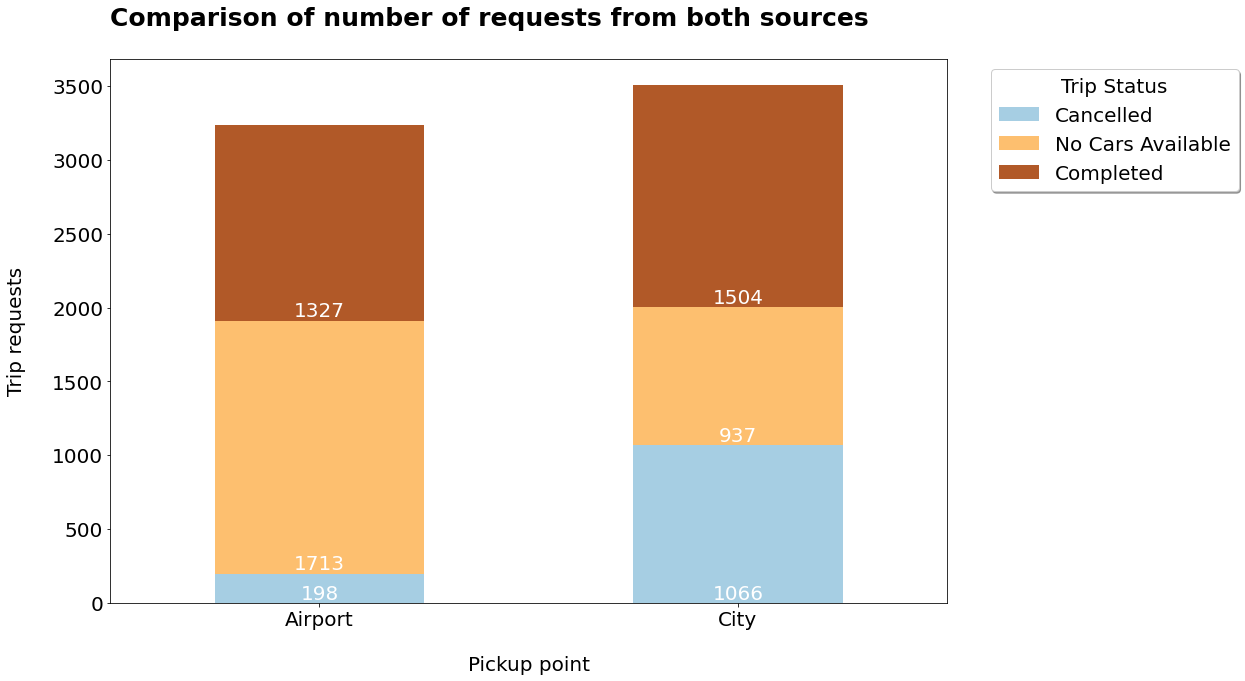

In [42]:
# Comparison of number of requests from both sources (Airport and City)
res = pickup_vs_status.plot(kind='bar', stacked=True,figsize=[15,10],colormap="Paired",fontsize=20)
plt.title("Comparison of number of requests from both sources\n",fontsize=25,loc="left",fontweight="bold")

plt.xlabel("\nPickup point",fontsize=20)
plt.setp( res.xaxis.get_majorticklabels(), rotation=0,fontsize=20)
plt.ylabel("Trip requests\n",fontsize=20)
plt.setp( res.yaxis.get_majorticklabels(), rotation=0,fontsize=20)
lgd = plt.legend(title='Trip Status',title_fontsize=20,loc='upper center', bbox_to_anchor=(1.2, 1), shadow=True, ncol=1, labels=['Cancelled', 'No Cars Available', 'Completed'],fontsize=20)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=20,color='w')
plt.savefig("01 - Comparison of number of requests from both sources.jpeg",dpi=400,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#### <font color="blue">Observation 1 - Trips requests from the City has higher number of cancellations compared to the one's starting from the Airport</font>
#### <font color="blue">Observation 2 - Trips requests from the Airport register higher number of No Car Availability compared to the one's requested from the City</font>
#### <font color="blue">Observation 3 - Successfull trips originating is slightly higher from the City compared to the Airport</font>

#### <font color="orange">Creating a pivot table - hourly_requests_vs_pickup to analyse number of requests each hour from each pickup point and plot a bar graph</font>

In [43]:
# Let's create a pivot table hourly_requests_vs_pickup for all trips from Airport or City to understand the Status of these requests per hour
hourly_requests_vs_pickup = pd.pivot_table(data=df,index=["RequestHour"],columns=["Pickup point"],values="Request id",aggfunc="count")
hourly_requests_vs_pickup.head()

Pickup point,Airport,City
RequestHour,,
0,53,46
1,42,43
2,41,58
3,45,47
4,72,131


findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


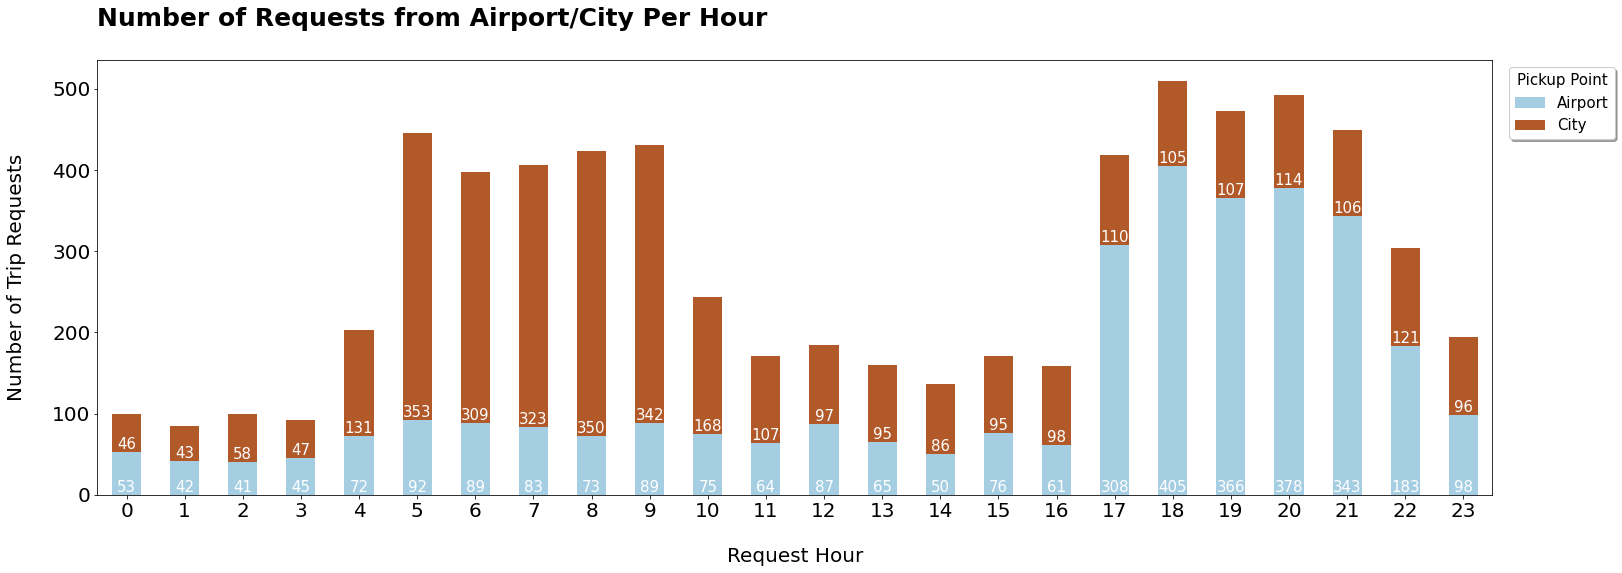

In [44]:
# Let's plot a bar chart for all trips from Airport or City to understand the Status of these requests per hour
plt.rcParams["font.family"] = "Open Sans"
res = hourly_requests_vs_pickup.plot(kind='bar', stacked=True, figsize=[25,8],colormap="Paired",fontsize=20)
plt.title("Number of Requests from Airport/City Per Hour\n",fontsize=25,fontweight="bold",loc="left")
plt.xlabel("\nRequest Hour",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20,rotation=0)
plt.ylabel("Number of Trip Requests\n",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20)
lgd = plt.legend(title='Pickup Point',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.05, 1), shadow=True, ncol=1, labels=["Airport","City"],fontsize=15)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=15,color='w')
plt.savefig("02 - Number of Requests from Airport-City Per Hour.jpeg",dpi=400,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#### <font color="blue">Observation 4 - Number of Trips Requests is higher from the Airport during the Early Mornings(4-6 AM) and Mornings(7-11 AM)</font>
#### <font color="blue">Observation 5 - Number of Trips Requests is higher from the City during the Evenings(5-6 PM) and Night(7 PM - Midnight)</font>

#### <font color="orange">Creating a new pivot table trip_completed which will show the total number of successful trips from Airport and City per hour</font>

In [45]:
# Let's create pivot table for all completed trips from Airport or City per hour
trip_completed = pd.pivot_table(data=df[df.Status=="Trip Completed"],index=["RequestHour"],columns=["Status","Pickup point"],values="Request id",aggfunc="count")

findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


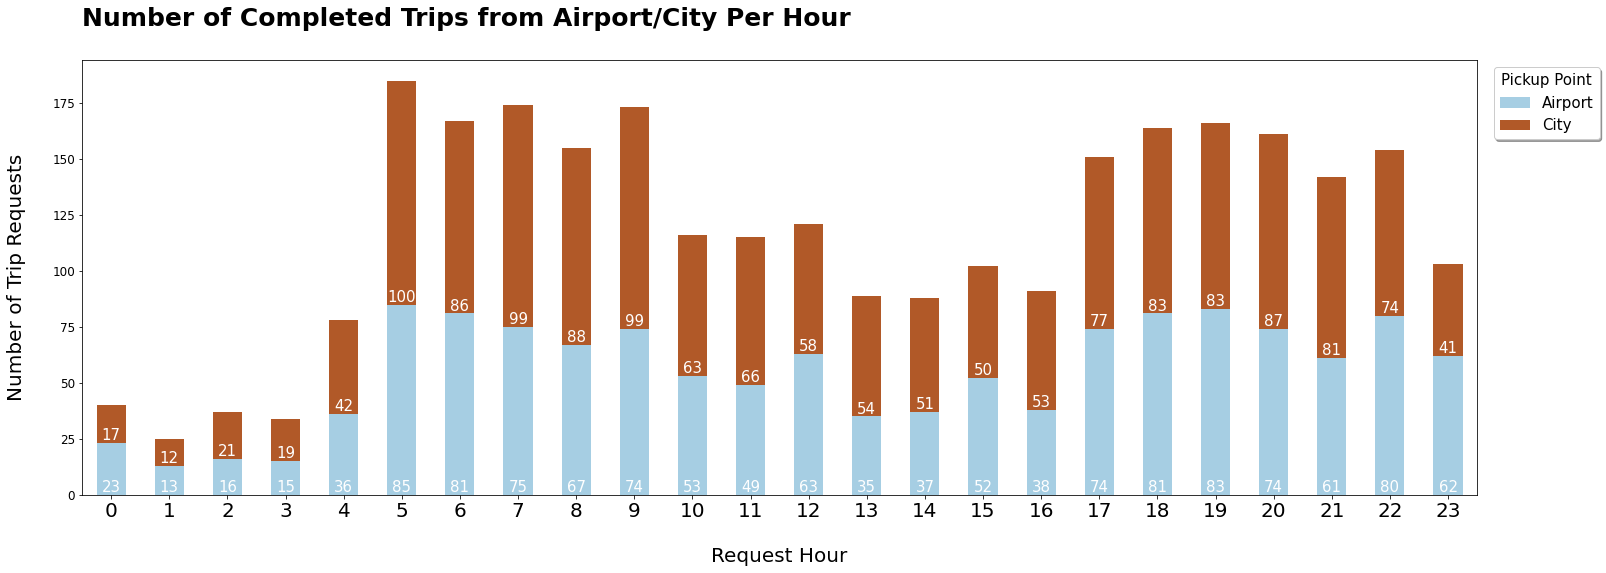

In [46]:
# Let's plot a bar chart for all completed trips from Airport or City per hour
res = trip_completed.plot(kind='bar', stacked=True, figsize=[25,8],colormap="Paired",fontsize=12)
plt.title("Number of Completed Trips from Airport/City Per Hour\n",fontsize=25,fontweight="bold",loc="left")
plt.xlabel("\nRequest Hour",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20,rotation=0)
plt.ylabel("Number of Trip Requests\n",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20)
lgd = plt.legend(title='Pickup Point',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.05, 1), shadow=True, ncol=1, labels=["Airport","City"],fontsize=15)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=15,color="w")
plt.savefig("03 - Number of Completed Trips from Airport-City Per Hour.jpeg",dpi=400,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#### <font color="blue">Observation 6 - The heaviest load was during the 5th hour of the day during the week. This time period has total successful requests of only 185. The total number of Drivers is 300.</font>
#### <font color="blue">This basically means that there are free drivers and cars available at this time but are either cancelling the requests or not taking any requests for some reason</font>

In [47]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestYear,RequestMonth,DropYear,DropMonth,Duration,SameDay,RequestDate,RequestDay,DropDate,DropDay,RequestTime,TimePeriod,RequestHour,DropHour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7,69.0,Yes,2016-07-11,Monday,2016-07-11,Monday,11:51:00,02 Morning,11,13
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7,50.0,Yes,2016-07-11,Monday,2016-07-11,Monday,17:57:00,04 Early Evening,17,18
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7,41.0,Yes,2016-07-12,Tuesday,2016-07-12,Tuesday,09:17:00,02 Morning,9,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7,55.0,Yes,2016-07-12,Tuesday,2016-07-12,Tuesday,21:08:00,06 Night,21,22
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7,52.516667,Yes,2016-07-13,Wednesday,2016-07-13,Wednesday,08:33:16,02 Morning,8,9


#### <font color="orange">Creating a pivot table - to plot a bar graph for number of requests during each time period of the day, such as "Morning, Evening, Afternoon etc."</font>

findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


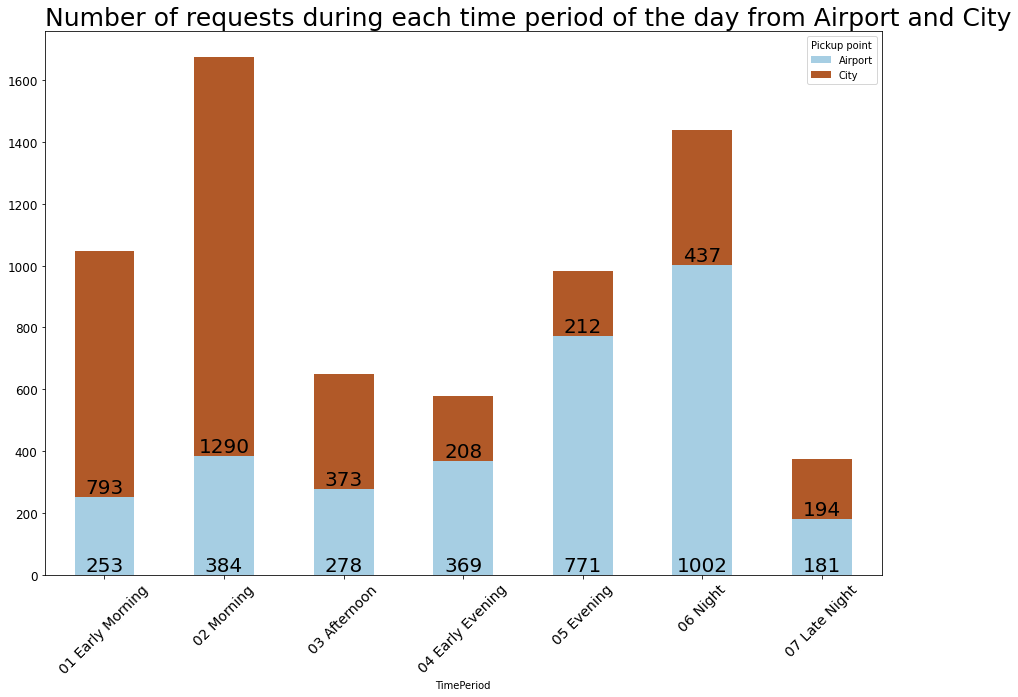

In [48]:
# Let's create a bar chart for all trips from Airport or City based on Time period such as Early Morning, Morning, Afternoon, Early Evening, Evening, Night, Late Night
res = pd.pivot_table(data=df,index=["TimePeriod"],columns="Pickup point",values="Request id",aggfunc="count").plot(kind='bar', stacked=True, figsize=[15,10],colormap="Paired",fontsize=12)
plt.setp(res.xaxis.get_majorticklabels(), rotation=45,fontsize=14)
plt.title("Number of requests during each time period of the day from Airport and City",fontsize=25,loc="left")
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=20)
plt.savefig("04 - Number of requests during each time period of the day from Airport and City.jpeg",dpi=400)
plt.show()

#### <font color="orange">Hour wise comparison of trip status per hour from Airport and City in 2 separate bar graphs below</font>

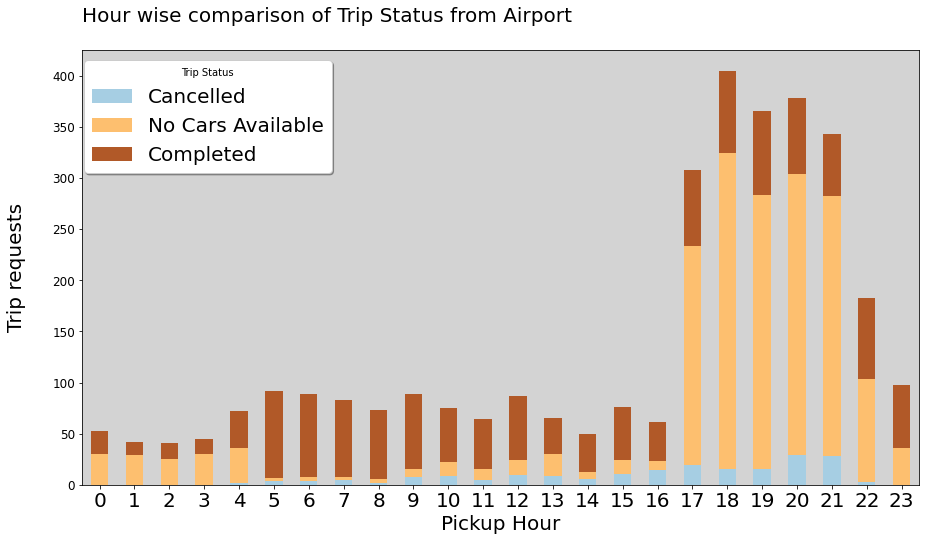

In [49]:
# Let's plot hour wise comparison of per hour number of requests based on their Status from Airport
res = pd.pivot_table(data=df[df["Pickup point"]=="Airport"],index=["RequestHour"],columns="Status",values="Request id",aggfunc="count").plot(kind='bar', stacked=True, figsize=[15,8],colormap="Paired",fontsize=12,sharey=True)
plt.setp(res.xaxis.get_majorticklabels(), rotation=90 )
res.set_facecolor('lightgray')
plt.xlabel("Pickup Hour",fontsize=20)
plt.setp( res.xaxis.get_majorticklabels(), rotation=0, fontsize=20)
plt.ylabel("Trip requests\n",fontsize=20)
plt.title("Hour wise comparison of Trip Status from Airport\n",fontsize=20,loc="left")
plt.legend(title='Trip Status',loc='upper center', bbox_to_anchor=(0.15, 1),shadow=True, ncol=1, labels=['Cancelled', 'No Cars Available', 'Completed'],fontsize=20)
plt.savefig("05 - Hour wise comparison of Trip Status from Airport.jpeg",dpi=400)
plt.show()

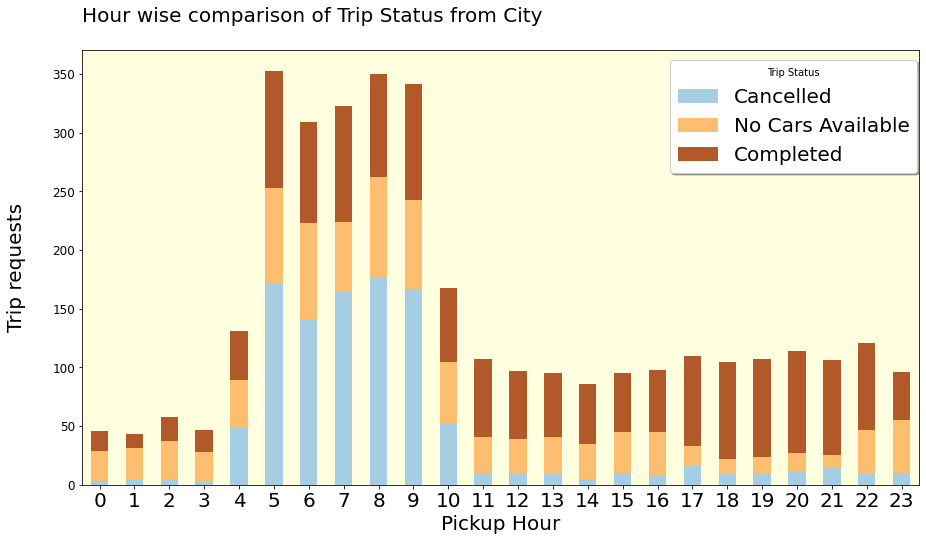

In [50]:
# Let's plot hour wise comparison of per hour number of requests based on their Status from City
res = pd.pivot_table(data=df[df["Pickup point"]=="City"],index=["RequestHour"],columns="Status",values="Request id",aggfunc="count").plot(kind='bar', stacked=True, figsize=[15,8],colormap="Paired",fontsize=12,sharey=True)
plt.setp(res.xaxis.get_majorticklabels(), rotation=90 )
res.set_facecolor('lightyellow')
plt.xlabel("Pickup Hour",fontsize=20)
plt.setp( res.xaxis.get_majorticklabels(), rotation=0,fontsize=20)
plt.ylabel("Trip requests\n",fontsize=20)
plt.title("Hour wise comparison of Trip Status from City\n",fontsize=20,loc="left")
lgd = plt.legend(title='Trip Status',loc='upper center', bbox_to_anchor=(0.85, 1),shadow=True, ncol=1, labels=['Cancelled', 'No Cars Available', 'Completed'],fontsize=20)
plt.savefig("06 - Hour wise comparison of Trip Status from City.jpeg",dpi=400,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#### <font color="orange">Box plot explaining the unavaialaibilit and cancellations from Aiport/City</font>

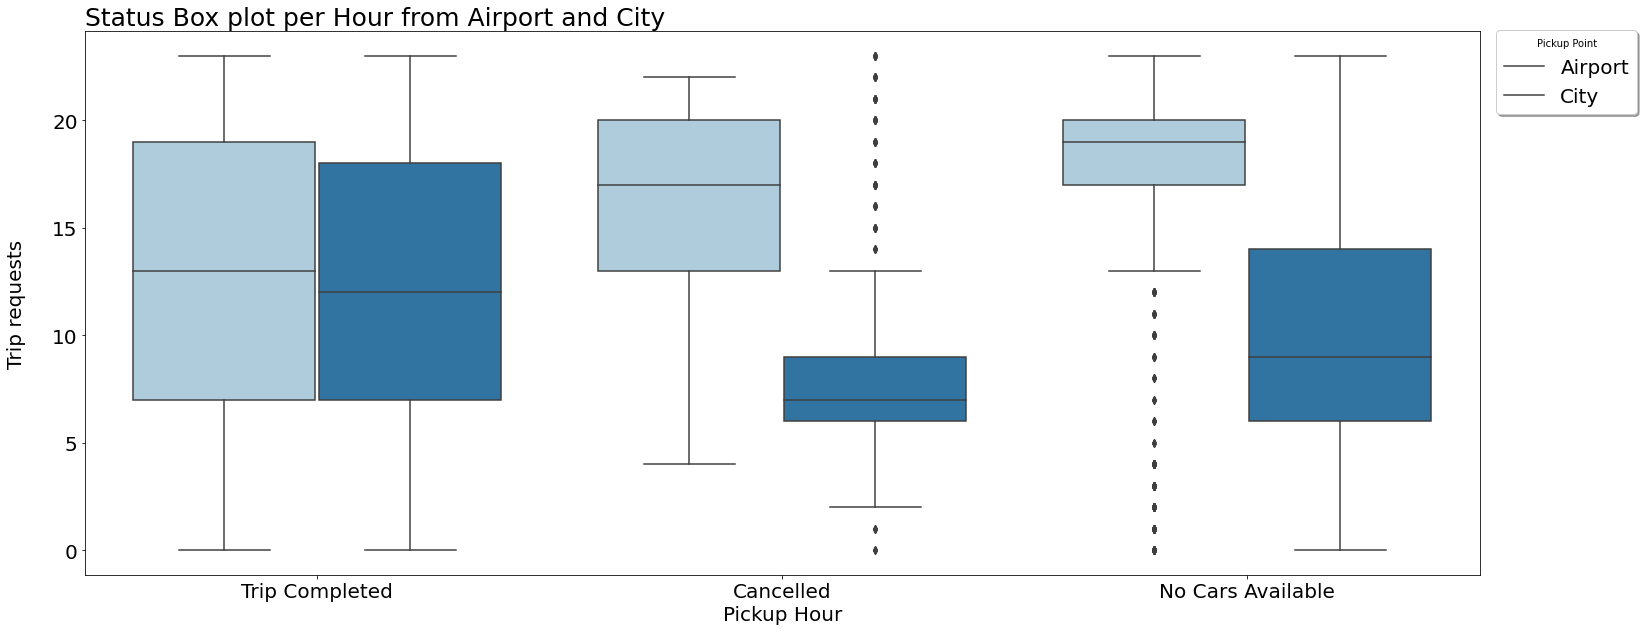

In [51]:
# Let's create a box plot to understand the cancellations and Unavailability per hour from Airport and City.
plt.figure(figsize=[25,10])
res = sns.boxplot(hue="Pickup point",y="RequestHour",x="Status",data=df,palette="Paired")
plt.title("Status Box plot per Hour from Airport and City",fontsize=25,loc="left")
plt.xlabel("Pickup Hour",fontsize=20)
plt.setp( res.xaxis.get_majorticklabels(), rotation=0,fontsize=20)
plt.ylabel("Trip requests\n",fontsize=20)
plt.setp( res.yaxis.get_majorticklabels(), rotation=0,fontsize=20)
lgd = plt.legend(title='Pickup Point',loc='upper right', bbox_to_anchor=(1.12, 1.02),shadow=True, ncol=1, labels=['Airport',"City"],fontsize=20)
plt.savefig("07 - Status Box plot per Hour from Airport and City.jpeg", dpi=400,bbox_extra_artists=(lgd,), bbox_inches='tight')
#plt.savefig("test_rasterization.eps", dpi=150)
plt.show()

#### <font color="blue">From the above visualization, we can see that the number of cars is not available between 7 am to 2 pm in the city and the airport between 5 pm to 8pm.No. of cancelled cabs in the city are happening from 6 to 9 am and in the airport between 1 to 8 pm.</font>

#### <font color="orange">Day wise comaprison of trip status each day during the week. One bar graph each for Airport and City</font>

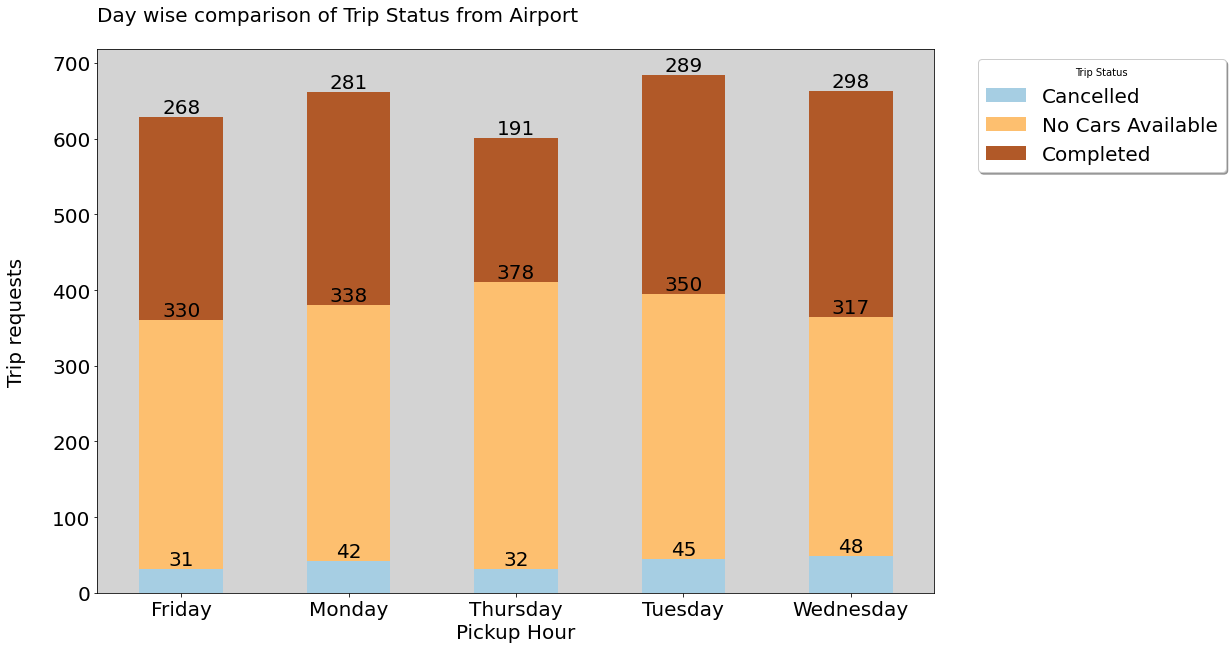

In [52]:
# Let's create a bar chart to compare Trip Requests by Status for each day from Airport
res = pd.pivot_table(data=df[df["Pickup point"]=="Airport"],index=["RequestDay"],columns="Status",values="Request id",aggfunc="count").plot(kind='bar', stacked=True, figsize=[15,10],colormap="Paired",fontsize=12,sharey=True)
res.set_facecolor('lightgray')
plt.xlabel("Pickup Hour",fontsize=20)
plt.setp( res.xaxis.get_majorticklabels(), rotation=0, fontsize=20)
plt.ylabel("Trip requests\n",fontsize=20)
plt.setp( res.yaxis.get_majorticklabels(), rotation=0,fontsize=20)
plt.title("Day wise comparison of Trip Status from Airport\n",fontsize=20,loc="left")
lgd = plt.legend(title='Trip Status',loc='upper center', bbox_to_anchor=(1.2, 1),shadow=True, ncol=1, labels=['Cancelled', 'No Cars Available', 'Completed'],fontsize=20)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y+height),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=20)
plt.savefig("08 - Day wise comparison of Trip Status from Airport.jpeg",dpi=400,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

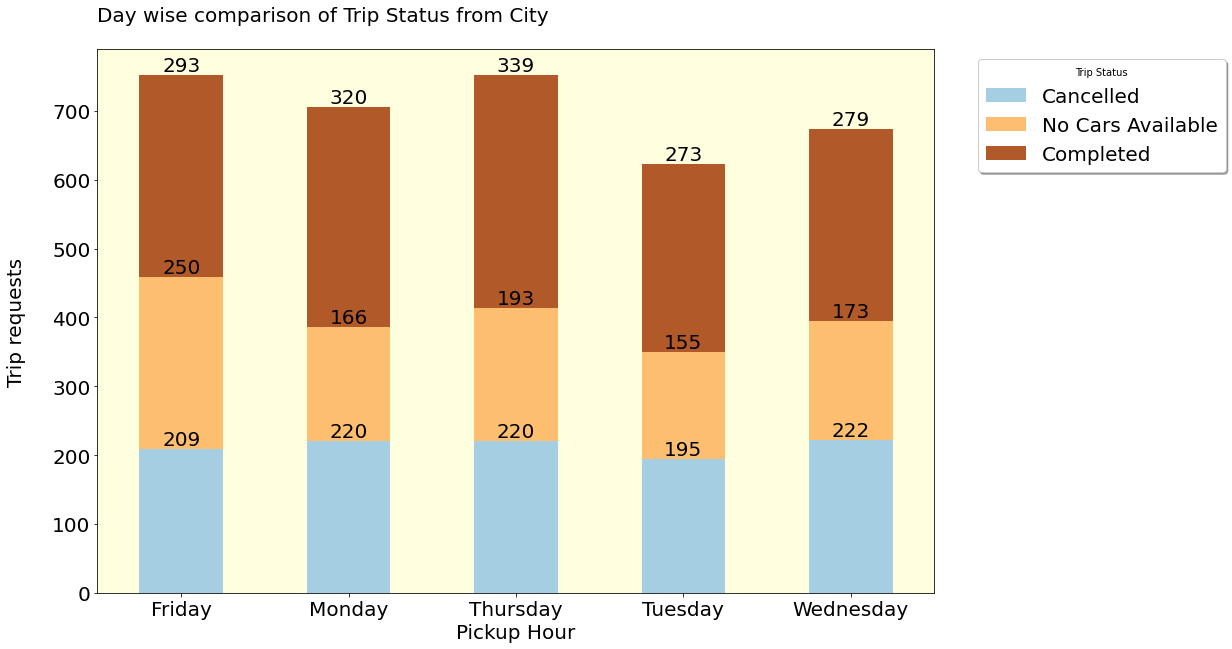

In [53]:
# Let's create a bar chart to compare Trip Requests by Status for each day from City
res = pd.pivot_table(data=df[df["Pickup point"]=="City"],index=["RequestDay"],columns="Status",values="Request id",aggfunc="count").plot(kind='bar', stacked=True, figsize=[15,10],colormap="Paired",fontsize=12,sharey=True)
res.set_facecolor('lightyellow')
plt.xlabel("Pickup Hour",fontsize=20)
plt.setp( res.xaxis.get_majorticklabels(), rotation=0,fontsize=20)
plt.ylabel("Trip requests\n",fontsize=20)
plt.setp( res.yaxis.get_majorticklabels(), rotation=0,fontsize=20)
plt.title("Day wise comparison of Trip Status from City\n",fontsize=20,loc="left")
lgd = plt.legend(title='Trip Status',loc='upper center', bbox_to_anchor=(1.2, 1),shadow=True, ncol=1, labels=['Cancelled', 'No Cars Available', 'Completed'],fontsize=20)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y+height),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=20)
plt.savefig("09 - Day wise comparison of Trip Status from City.jpeg",dpi=400,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#### <font color="blue">Performance of Trips based on Status is almost same each day</font>

#### <font color="orange">Creating a pivot table - sd to analyze supply and demand</font>

In [54]:
#Let's create a pivot table to understand the supply demand per hour based on Status from Airport and City
sd = pd.pivot_table(data=df,index=["RequestHour","Pickup point"],columns="Status",values="Request id",aggfunc="count",margins=True,margins_name="All")
sd.fillna(0,inplace=True)
sd["%Cancelled"]=100*sd["Cancelled"]/sd.All
sd["%NoCarsAvailable"]=100*sd["No Cars Available"]/sd.All
sd["%Completed"]=100*sd["Trip Completed"]/sd.All
sd.drop(columns=["All"],inplace=True)
sd.head()

Status                    Cancelled  No Cars Available  Trip Completed  \
RequestHour Pickup point                                                 
0           Airport             0.0               30.0            23.0   
            City                3.0               26.0            17.0   
1           Airport             0.0               29.0            13.0   
            City                4.0               27.0            12.0   
2           Airport             0.0               25.0            16.0   

Status                    %Cancelled  %NoCarsAvailable  %Completed  
RequestHour Pickup point                                            
0           Airport         0.000000         56.603774   43.396226  
            City            6.521739         56.521739   36.956522  
1           Airport         0.000000         69.047619   30.952381  
            City            9.302326         62.790698   27.906977  
2           Airport         0.000000         60.975610   39.024390

#### <font color="orange">A Bar graph each for Airport and City and compare supply (% Completed) and demand(% Cancelled + %No Cars Available)</font>

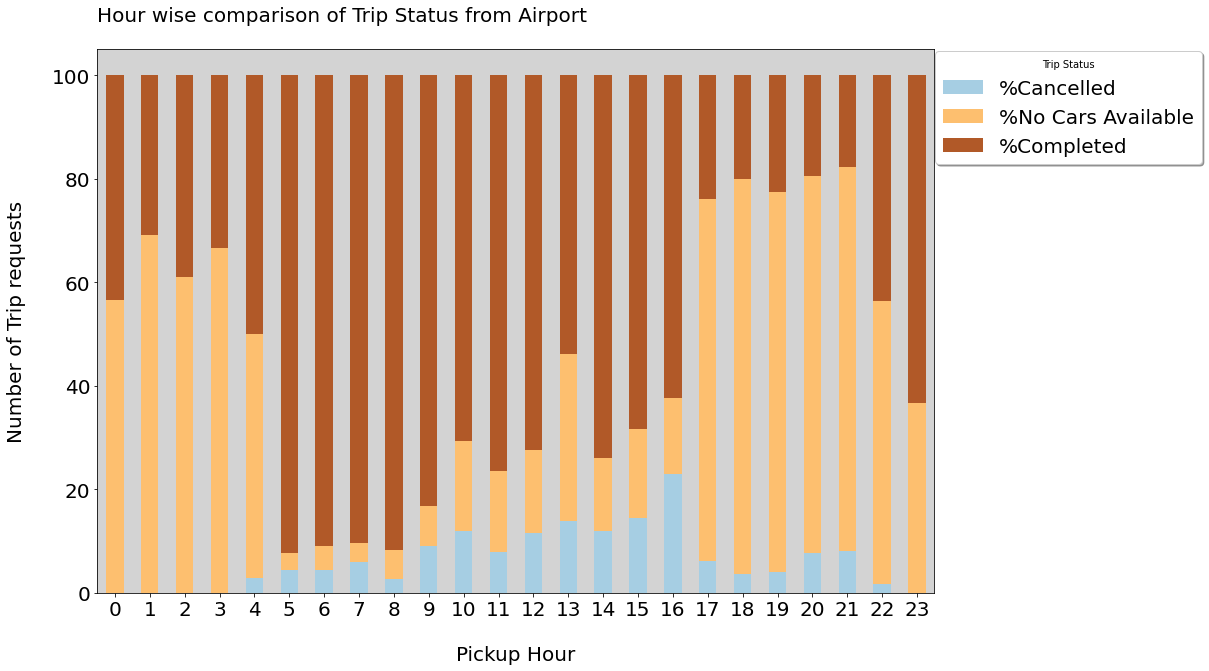

In [55]:
#Let's create a bar chart to understand the supply demand per hour based on Status from Airport
res = sd.xs("Airport",level=1).iloc[0:,3:].plot(kind='bar', stacked=True, figsize=[15,10],colormap="Paired",fontsize=12,sharey=True)
plt.setp(res.xaxis.get_majorticklabels(), rotation=90 )
res.set_facecolor('lightgray')
plt.xlabel("\nPickup Hour",fontsize=20)
plt.setp( res.xaxis.get_majorticklabels(), rotation=0,fontsize=20)
plt.ylabel("Number of Trip requests\n",fontsize=20)
plt.setp( res.yaxis.get_majorticklabels(), rotation=0,fontsize=20)
plt.title("Hour wise comparison of Trip Status from Airport\n",fontsize=20,loc="left")
lgd = plt.legend(title='Trip Status',loc='upper center', bbox_to_anchor=(1.16, 1.015),shadow=True, ncol=1, labels=['%Cancelled', '%No Cars Available', '%Completed'],fontsize=20)
plt.savefig("10 - Hour wise comparison of Trip Status from Airport.jpeg",dpi=400,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

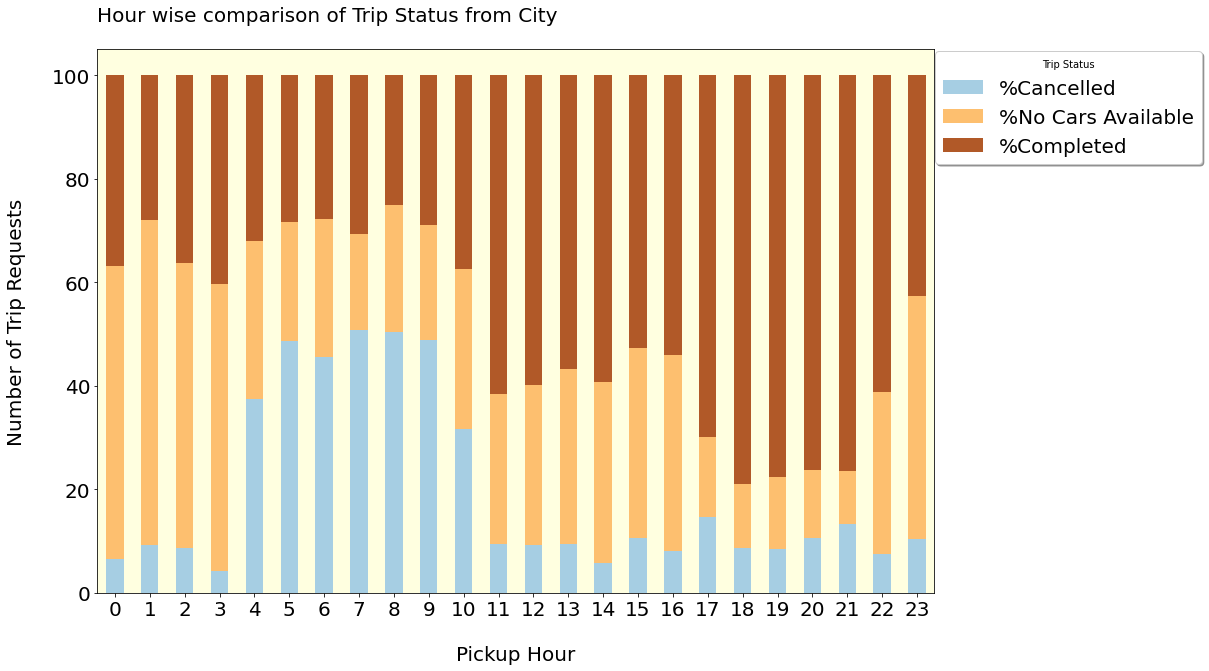

In [56]:
#Let's create a bar chart to understand the supply demand per hour based on Status from City
res = sd.xs("City",level=1).iloc[0:,3:].plot(kind='bar', stacked=True, figsize=[15,10],colormap="Paired",fontsize=12,sharey=True)
plt.setp(res.xaxis.get_majorticklabels(), rotation=90 )
res.set_facecolor('lightyellow')
plt.xlabel("\nPickup Hour",fontsize=20)
plt.setp( res.xaxis.get_majorticklabels(), rotation=0,fontsize=20)
plt.ylabel("Number of Trip Requests\n",fontsize=20)
plt.setp( res.yaxis.get_majorticklabels(), rotation=0,fontsize=20)
plt.title("Hour wise comparison of Trip Status from City\n",fontsize=20,loc="left")
lgd = plt.legend(title='Trip Status',loc='upper center', bbox_to_anchor=(1.16, 1.015),shadow=True, ncol=1, labels=['%Cancelled', '%No Cars Available', '%Completed'],fontsize=20)
plt.savefig("11 - Hour wise comparison of Trip Status from City.jpeg",dpi=400,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#### <font color="orange">Creating a pivot table - trip_duration to compare the number of requests by duration/distance(Closest,Near,Far,Farthest) from each pickup point and plot a bar graph</font>

In [57]:
#Let's create a pivot table to analyse duration of all completed trips (where Duration is not null)
trip_duration = df[["RequestHour","Duration","Request id","Status","Pickup point"]][(~df.Duration.isna())]

In [58]:
trip_duration.head()

,RequestHour,Duration,Request id,Status,Pickup point
0,11,69.0,619,Trip Completed,Airport
1,17,50.0,867,Trip Completed,Airport
2,9,41.0,1807,Trip Completed,City
3,21,55.0,2532,Trip Completed,Airport
4,8,52.516667,3112,Trip Completed,City


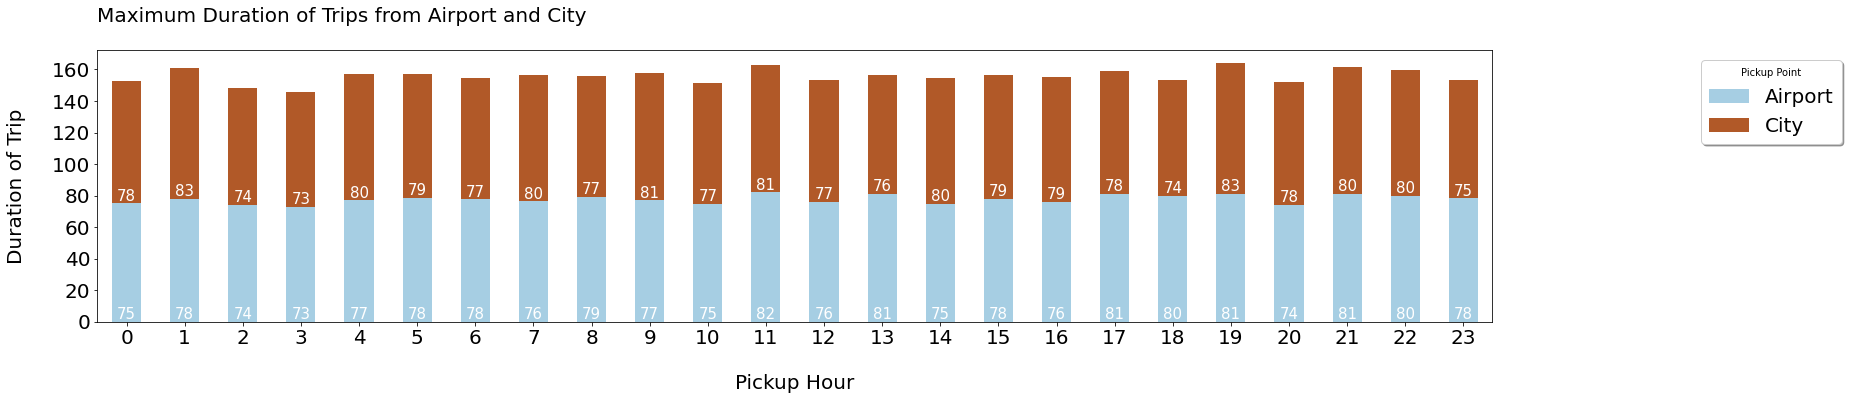

In [59]:
#Let's create a bar chart to analyse the maximum duration of all completed trips (where Duration is not null) from Airport or City
res = pd.pivot_table(data=trip_duration,index="RequestHour",columns="Pickup point",values="Duration",aggfunc="max").plot(kind='bar', stacked=True, figsize=[25,5],colormap="Paired",fontsize=12,sharey=True)
plt.setp(res.xaxis.get_majorticklabels(), rotation=90 )
plt.xlabel("\nPickup Hour",fontsize=20)
plt.setp( res.xaxis.get_majorticklabels(), rotation=0,fontsize=20)
plt.ylabel("Duration of Trip\n",fontsize=20)
plt.setp( res.yaxis.get_majorticklabels(), rotation=0,fontsize=20)
plt.title("Maximum Duration of Trips from Airport and City\n",fontsize=20,loc="left")
lgd = plt.legend(title='Pickup Point',loc='upper center', bbox_to_anchor=(1.2, 1),shadow=True, ncol=1, labels=['Airport',"City"],fontsize=20)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=15,color="w")
plt.savefig("12 - Maximum Duration of Trips from Airport and City.jpeg",dpi=400,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

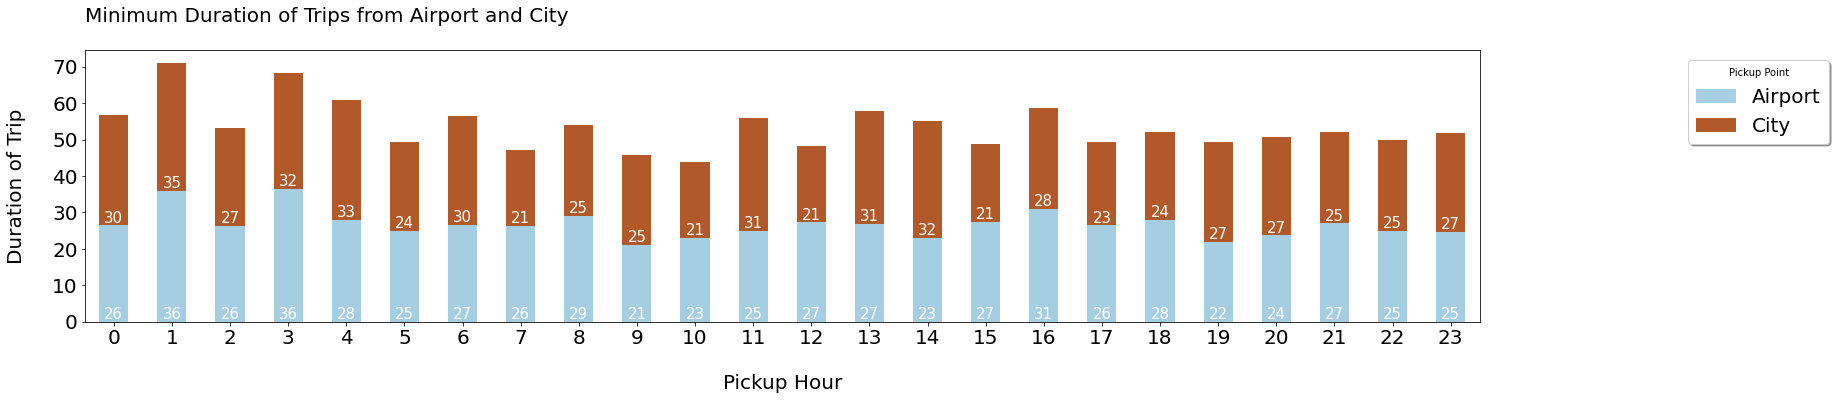

In [60]:
#Let's create a bar chart to analyse the minimum duration of all completed trips (where Duration is not null) from Airport or City
res = pd.pivot_table(data=trip_duration,index="RequestHour",columns="Pickup point",values="Duration",aggfunc="min").plot(kind='bar', stacked=True, figsize=[25,5],colormap="Paired",fontsize=12,sharey=True)
plt.setp(res.xaxis.get_majorticklabels(), rotation=90 )
plt.xlabel("\nPickup Hour",fontsize=20)
plt.setp( res.xaxis.get_majorticklabels(), rotation=0,fontsize=20)
plt.ylabel("Duration of Trip\n",fontsize=20)
plt.setp( res.yaxis.get_majorticklabels(), rotation=0,fontsize=20)
plt.title("Minimum Duration of Trips from Airport and City\n",fontsize=20,loc="left")
lgd = plt.legend(title='Pickup Point',loc='upper center', bbox_to_anchor=(1.2, 1),shadow=True, ncol=1, labels=['Airport',"City"],fontsize=20)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=15,color="w")
plt.savefig("13 - Minimum Duration of Trips from Airport and City.jpeg",dpi=400,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#### <font color="orange">Creating a pivot table - sorted_df sorted on driver id and request timestamp</font>
#### <font color="orange">Then comparing the gap between each request and the location from where the next trip started for the driver</font>
#### <font color="blue">And making observations based on that</font>

In [61]:
# Let's create a new dataframe and we will add columsn to it find out what the what the parameters were for the drivers next trip. Such as - From where the next trip start, did it start in the same hour etc.
# for this first lets sort the data on Driver id and Request Timestamp
sorted_df = df[~df.Duration.isna()].sort_values(by=["Driver id","Request timestamp"])
sorted_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestYear,RequestMonth,DropYear,DropMonth,Duration,SameDay,RequestDate,RequestDay,DropDate,DropDay,RequestTime,TimePeriod,RequestHour,DropHour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7,69.0,Yes,2016-07-11,Monday,2016-07-11,Monday,11:51:00,02 Morning,11,13
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7,50.0,Yes,2016-07-11,Monday,2016-07-11,Monday,17:57:00,04 Early Evening,17,18
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7,41.0,Yes,2016-07-12,Tuesday,2016-07-12,Tuesday,09:17:00,02 Morning,9,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7,55.0,Yes,2016-07-12,Tuesday,2016-07-12,Tuesday,21:08:00,06 Night,21,22
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7,52.516667,Yes,2016-07-13,Wednesday,2016-07-13,Wednesday,08:33:16,02 Morning,8,9


In [62]:
# Next, we will use the shift(-1) function to fetch the next row
sorted_df["Driver id_next"] = sorted_df["Driver id"].shift(-1)
sorted_df["Pickup point_next"] = sorted_df["Pickup point"].shift(-1)
sorted_df["Request timestamp_next"] = sorted_df["Request timestamp"].shift(-1)
sorted_df["Duration_next"] = sorted_df["Duration"].shift(-1)
sorted_df["TimePeriod_next"] = sorted_df["TimePeriod"].shift(-1)
sorted_df["RequestHour_next"] = sorted_df["RequestHour"].shift(-1)
sorted_df["RequestDay_next"] = sorted_df["RequestDay"].shift(-1)
sorted_df["RequestHour_next"] = sorted_df["RequestHour_next"].astype("Int64")
sorted_df["RequestDate_next"] = sorted_df["RequestDate"].shift(-1)

In [63]:
# Let's rearrange the columsn a bit to make the  dataframe more readable
sorted_df = sorted_df[["Request id","Driver id","Driver id_next","Pickup point","Pickup point_next","Request timestamp","Request timestamp_next","Duration","Duration_next","TimePeriod","TimePeriod_next","RequestHour","RequestHour_next","RequestDay","RequestDay_next","RequestDate","RequestDay_next"]]
sorted_df.head()

,Request id,Driver id,Driver id_next,Pickup point,Pickup point_next,Request timestamp,Request timestamp_next,Duration,Duration_next,TimePeriod,TimePeriod_next,RequestHour,RequestHour_next,RequestDay,RequestDay_next,RequestDate,RequestDay_next
0,619,1.0,1.0,Airport,Airport,2016-07-11 11:51:00,2016-07-11 17:57:00,69.0,50.0,02 Morning,04 Early Evening,11,17,Monday,Monday,2016-07-11,Monday
1,867,1.0,1.0,Airport,City,2016-07-11 17:57:00,2016-07-12 09:17:00,50.0,41.0,04 Early Evening,02 Morning,17,9,Monday,Tuesday,2016-07-11,Tuesday
2,1807,1.0,1.0,City,Airport,2016-07-12 09:17:00,2016-07-12 21:08:00,41.0,55.0,02 Morning,06 Night,9,21,Tuesday,Tuesday,2016-07-12,Tuesday
3,2532,1.0,1.0,Airport,City,2016-07-12 21:08:00,2016-07-13 08:33:16,55.0,52.516667,06 Night,02 Morning,21,8,Tuesday,Wednesday,2016-07-12,Wednesday
4,3112,1.0,1.0,City,Airport,2016-07-13 08:33:16,2016-07-13 21:57:28,52.516667,31.516667,02 Morning,06 Night,8,21,Wednesday,Wednesday,2016-07-13,Wednesday


In [64]:
# Now for some rows, we must be fetching the details of the trip where the driver id is not same. We will identify these rows and since these are the last trips taken by the driver, we will mark these as "Waiting" for now.
sorted_df[sorted_df["Driver id"] != sorted_df["Driver id_next"]]

,Request id,Driver id,Driver id_next,Pickup point,Pickup point_next,Request timestamp,Request timestamp_next,Duration,Duration_next,TimePeriod,TimePeriod_next,RequestHour,RequestHour_next,RequestDay,RequestDay_next,RequestDate,RequestDay_next
8,6248,1.0,10.0,City,Airport,2016-07-15 17:57:27,2016-07-12 09:13:00,53.4,48.0,04 Early Evening,02 Morning,17,9,Friday,Tuesday,2016-07-15,Tuesday
92,6157,10.0,100.0,Airport,City,2016-07-15 16:32:51,2016-07-11 03:22:00,71.883333,35.0,04 Early Evening,07 Late Night,16,3,Friday,Monday,2016-07-15,Monday
973,5834,100.0,101.0,Airport,City,2016-07-15 08:54:03,2016-07-11 12:28:00,71.833333,28.0,02 Morning,03 Afternoon,8,12,Friday,Monday,2016-07-15,Monday
981,6604,101.0,102.0,City,Airport,2016-07-15 21:42:04,2016-07-11 08:09:00,37.233333,67.0,06 Night,02 Morning,21,8,Friday,Monday,2016-07-15,Monday
991,6704,102.0,103.0,Airport,Airport,2016-07-15 22:58:01,2016-07-12 15:02:00,61.566667,34.0,06 Night,03 Afternoon,22,15,Friday,Tuesday,2016-07-15,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,6645,95.0,96.0,City,Airport,2016-07-15 22:10:21,2016-07-11 05:35:00,50.4,65.0,06 Night,01 Early Morning,22,5,Friday,Monday,2016-07-15,Monday
935,6198,96.0,97.0,Airport,Airport,2016-07-15 17:23:01,2016-07-11 10:37:00,48.733333,67.0,04 Early Evening,02 Morning,17,10,Friday,Monday,2016-07-15,Monday
944,6577,97.0,98.0,City,Airport,2016-07-15 21:19:03,2016-07-12 06:21:00,29.85,71.0,06 Night,01 Early Morning,21,6,Friday,Tuesday,2016-07-15,Tuesday
956,6252,98.0,99.0,City,Airport,2016-07-15 18:00:40,2016-07-11 05:08:00,45.383333,61.0,05 Evening,01 Early Morning,18,5,Friday,Monday,2016-07-15,Monday


##### <font color="blue">There are 300 such rows, after which there is no more request for each driver. Which makes sense as the total number of unique drivers for this data is 300</font>

In [65]:
# To achieve this, lets add a column "Waiting"
sorted_df["Waiting"] = 0
sorted_df.Waiting.value_counts()

0    2831
Name: Waiting, dtype: int64

In [66]:
# Lets mark all these rows as Waiting in the Waiting column
for index,row in sorted_df[["Waiting"]][sorted_df["Driver id"] != sorted_df["Driver id_next"]].iterrows():
    sorted_df.at[index,"Waiting"]="Waiting"

In [67]:
sorted_df[["Waiting"]][sorted_df["Driver id"] != sorted_df["Driver id_next"]].value_counts()

Waiting
Waiting    300
dtype: int64

In [68]:
sorted_df.Waiting.value_counts(dropna=False)

0          2531
Waiting     300
Name: Waiting, dtype: int64

In [69]:
#sorted_df["Waiting"][(~(sorted_df["RequestHour"] == sorted_df["RequestHour_next"])) & (sorted_df["Driver id"] == sorted_df["Driver id_next"]) & (~(sorted_df["Pickup point"] == sorted_df["Pickup point_next"]))] = "Waiting"
# Next for those rows where the request hour is not same, for the same driver id and if the pickup point is not same for the next trip, then lets mark these rows as well as Waitring
for index,row in sorted_df[["Waiting"]][(~(sorted_df["RequestHour"] == sorted_df["RequestHour_next"])) & (sorted_df["Driver id"] == sorted_df["Driver id_next"]) & (~(sorted_df["Pickup point"] == sorted_df["Pickup point_next"]))].iterrows():
    sorted_df.at[index,"Waiting"]="Waiting"

In [70]:
sorted_df["Waiting"][(~(sorted_df["RequestHour"] == sorted_df["RequestHour_next"])) & (sorted_df["Driver id"] == sorted_df["Driver id_next"]) & (~(sorted_df["Pickup point"] == sorted_df["Pickup point_next"]))].value_counts(dropna=False)

Waiting    1310
Name: Waiting, dtype: int64

#### <font color="blue">Please note that the Waiting indicator does not simply mean the driver was really waiting. It means that either the driver was waiting or used other channels to get customers but didnt use the Uber platform to accept the next ride. This will help us determine how many such drivers were available each hour and compare it against the demand and failed (Cancelled or Unavailable Car) requests</font>

In [71]:
sorted_df[sorted_df.Waiting=="Waiting"]

,Request id,Driver id,Driver id_next,Pickup point,Pickup point_next,Request timestamp,Request timestamp_next,Duration,Duration_next,TimePeriod,TimePeriod_next,RequestHour,RequestHour_next,RequestDay,RequestDay_next,RequestDate,RequestDay_next,Waiting
1,867,1.0,1.0,Airport,City,2016-07-11 17:57:00,2016-07-12 09:17:00,50.0,41.0,04 Early Evening,02 Morning,17,9,Monday,Tuesday,2016-07-11,Tuesday,Waiting
2,1807,1.0,1.0,City,Airport,2016-07-12 09:17:00,2016-07-12 21:08:00,41.0,55.0,02 Morning,06 Night,9,21,Tuesday,Tuesday,2016-07-12,Tuesday,Waiting
3,2532,1.0,1.0,Airport,City,2016-07-12 21:08:00,2016-07-13 08:33:16,55.0,52.516667,06 Night,02 Morning,21,8,Tuesday,Wednesday,2016-07-12,Wednesday,Waiting
4,3112,1.0,1.0,City,Airport,2016-07-13 08:33:16,2016-07-13 21:57:28,52.516667,31.516667,02 Morning,06 Night,8,21,Wednesday,Wednesday,2016-07-13,Wednesday,Waiting
7,5510,1.0,1.0,Airport,City,2016-07-15 05:11:52,2016-07-15 17:57:27,56.0,53.4,01 Early Morning,04 Early Evening,5,17,Friday,Friday,2016-07-15,Friday,Waiting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,101,99.0,99.0,Airport,City,2016-07-11 05:08:00,2016-07-11 07:53:00,61.0,62.0,01 Early Morning,02 Morning,5,7,Monday,Monday,2016-07-11,Monday,Waiting
959,871,99.0,99.0,City,Airport,2016-07-11 17:57:00,2016-07-11 23:11:00,45.0,63.0,04 Early Evening,06 Night,17,23,Monday,Monday,2016-07-11,Monday,Waiting
961,3227,99.0,99.0,Airport,City,2016-07-13 09:52:49,2016-07-14 18:14:26,40.816667,65.866667,02 Morning,05 Evening,9,18,Wednesday,Thursday,2016-07-13,Thursday,Waiting
963,5373,99.0,99.0,City,Airport,2016-07-14 23:42:23,2016-07-15 21:49:41,35.016667,38.95,06 Night,06 Night,23,21,Thursday,Friday,2016-07-14,Friday,Waiting


#### <font color="blue">We have a total of 1610 rows where the driver didnt accept a request when they were in the location but chose to either wait or got customers from other channels</font>
#### <font color="orange">Plotting a bar graph to show how many drivers are not accepting a request or accepted a customer thru a different channel or simply decided to wait but not accept a request</font>
#### <font color="orange">For simplicity, there is a column name "Waiting" to explain such scenario</font>

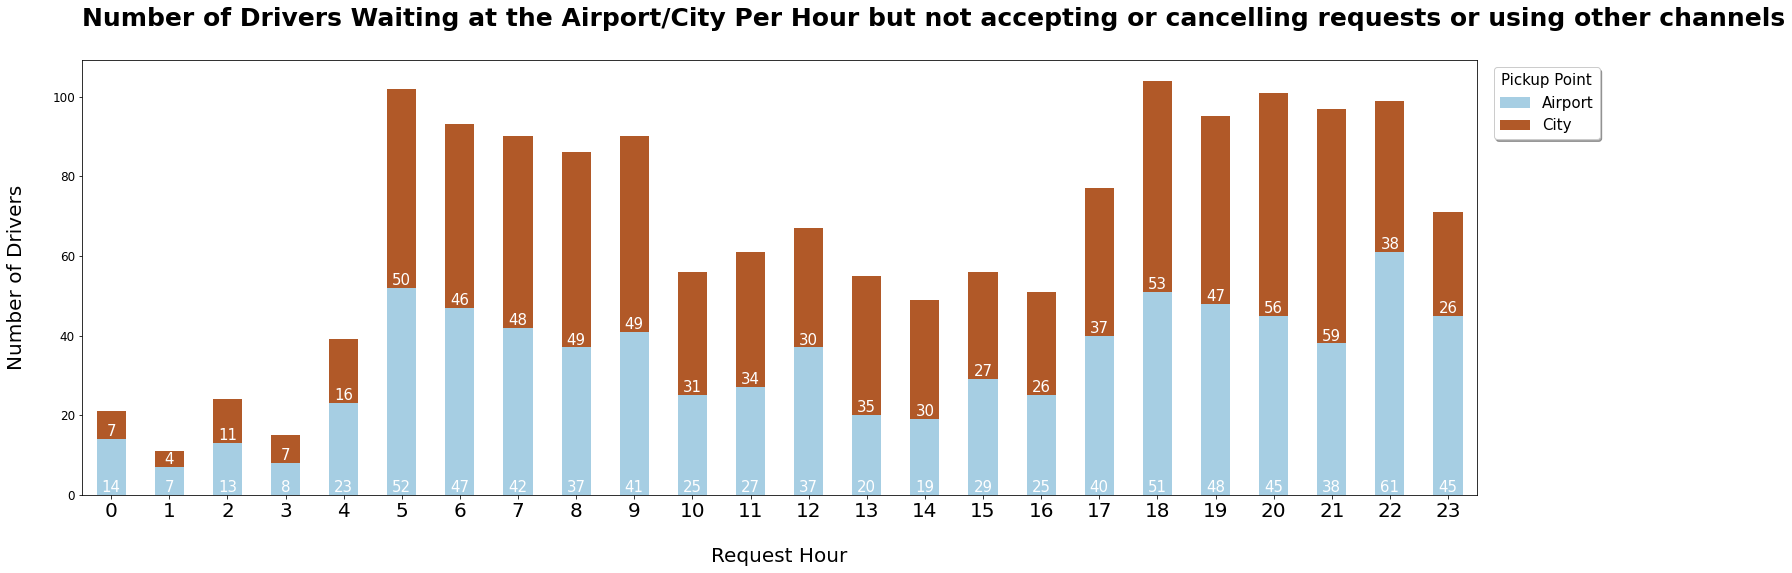

In [72]:
res = pd.pivot_table(data=sorted_df[sorted_df.Waiting=="Waiting"],index="RequestHour",columns="Pickup point",values="Waiting",aggfunc="count").plot(kind="bar",stacked=True,figsize=[25,8],colormap="Paired",fontsize=12)
plt.title("Number of Drivers Waiting at the Airport/City Per Hour but not accepting or cancelling requests or using other channels\n",fontsize=25,fontweight="bold",loc="left")
plt.xlabel("\nRequest Hour",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20,rotation=0)
plt.ylabel("Number of Drivers\n",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20)
lgd = plt.legend(title='Pickup Point',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.05, 1), shadow=True, ncol=1, labels=["Airport","City"],fontsize=15)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=15,color="w")
plt.savefig("14 - Number of Drivers Waiting at the Airport or City per Hour but not accepting or cancelling requests or using other channels.jpeg",dpi=400,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [73]:
hourly_requests_vs_status = pd.pivot_table(data=df,index=["RequestHour"],columns=["Status"],values="Request id",aggfunc="count")
hourly_requests_vs_status.head()

Status,Cancelled,No Cars Available,Trip Completed
RequestHour,,,
0,3,56,40
1,4,56,25
2,5,57,37
3,2,56,34
4,51,74,78


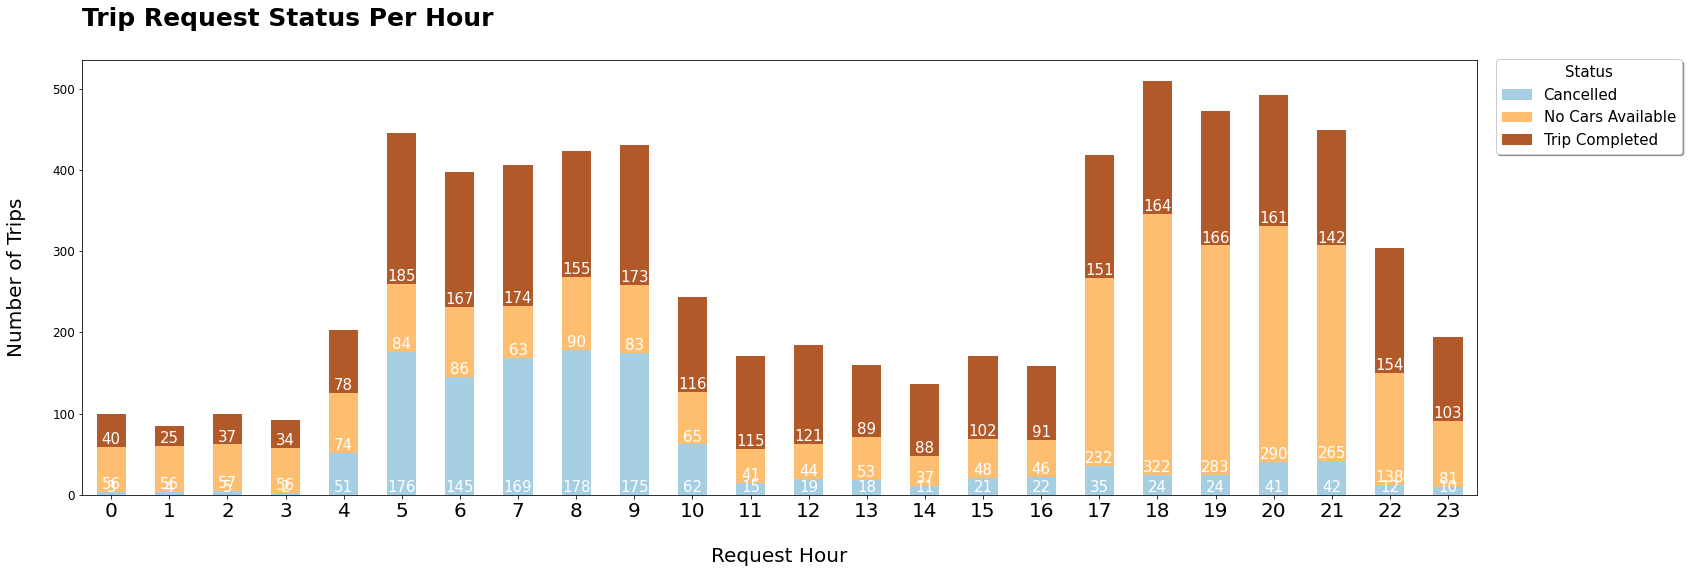

In [74]:
res = hourly_requests_vs_status.plot(kind="bar",stacked=True,figsize=[25,8],colormap="Paired",fontsize=12)
plt.title("Trip Request Status Per Hour\n",fontsize=25,fontweight="bold",loc="left")
plt.xlabel("\nRequest Hour",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20,rotation=0)
plt.ylabel("Number of Trips\n",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20)
lgd = plt.legend(title='Status',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.08, 1.019), shadow=True, ncol=1, labels=["Cancelled","No Cars Available","Trip Completed"],fontsize=15)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=15,color="w")
plt.savefig("15 - Trip Requests Status per Hour.jpeg",dpi=400,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#### <font color="orange">Analyzing different types of Trip Distances that were successful</font>
#### <font color="orange">Closest, Near, Far and Farthest (not an indicator of distance but duration) are just used for simplicity to depict the kind of distances that are more acceptable to drivers</font>

In [75]:
# Let's look at the duration column and see the number of trips based on certain bucket of Durations. Like duration less than 30. Between 30 and 45. 45 and 60, 60 and 70 and more than 70
df.Duration[(df.Duration<30)].size,df.Duration[(df.Duration>=30) & (df.Duration<45)].size,df.Duration[(df.Duration>=45) & (df.Duration<60)].size,df.Duration[(df.Duration>=60) & (df.Duration<70)].size,df.Duration[(df.Duration>=70)].size

(110, 841, 938, 571, 371)

In [76]:
# Let's add a column for these buckets. we will call it Distance Estimator for now.
df["DistanceEstimator"] = pd.NA

In [77]:
# Add now lets create the buckets.
df["DistanceEstimator"][df.Duration<30] = "01 Closest"
df["DistanceEstimator"][(df.Duration>=30) & (df.Duration<45)] = "02 Near"
df["DistanceEstimator"][(df.Duration>=45) & (df.Duration<60)] = "03 Far"
df["DistanceEstimator"][(df.Duration>=60)] = "04 Farthest"

In [78]:
df["DistanceEstimator"].value_counts(dropna=False)

NaN            3914
04 Farthest     942
03 Far          938
02 Near         841
01 Closest      110
Name: DistanceEstimator, dtype: int64

In [79]:
# Now lets create a pivot table to see the number of completed trips from Airport and City and see how many of these fall in each Duration/Distance bucket
pd.pivot_table(data=df,index="Pickup point",columns="DistanceEstimator",values="Request id",aggfunc="count")

DistanceEstimator,01 Closest,02 Near,03 Far,04 Farthest
Pickup point,,,,
Airport,49,409,436,433
City,61,432,502,509


#### <font color="orange">Plotting a bar graph to show the type of duration that are successful</font>
#### <font color="blue">Generally the duration of requests that are least in service that are closest. Far and Farthest duration/distance seem to be more common</font>

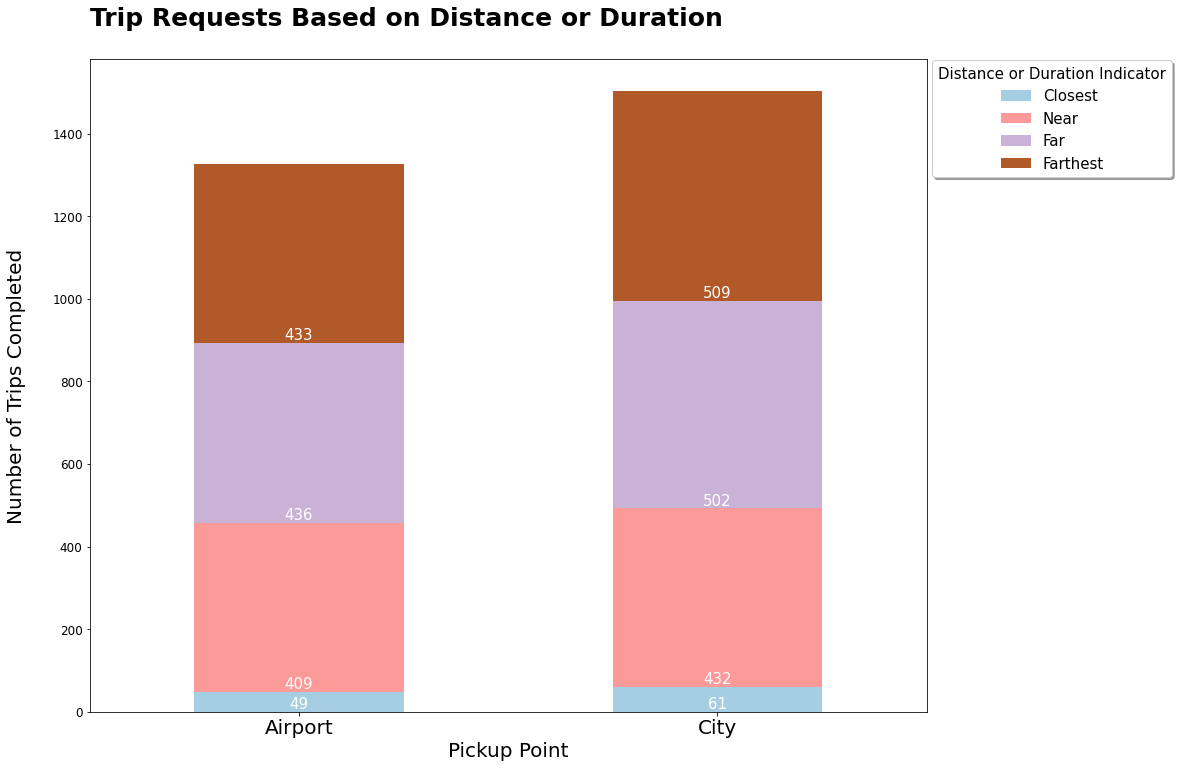

In [80]:
# Now lets create a bar chart to see the number of completed trips from Airport and City and see how many of these fall in each Duration/Distance bucket
res = pd.pivot_table(data=df,index="Pickup point",columns="DistanceEstimator",values="Request id",aggfunc="count").plot(kind="bar",figsize=[15,12],stacked=True,colormap="Paired",fontsize=12)
plt.title("Trip Requests Based on Distance or Duration\n",fontsize=25,fontweight="bold",loc="left")
plt.xlabel("Pickup Point",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20,rotation=0)
plt.ylabel("Number of Trips Completed\n",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20)
lgd = plt.legend(title='Distance or Duration Indicator',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.15, 1.01), shadow=True, ncol=1, labels=["Closest","Near","Far","Farthest"],fontsize=15)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=15,color="w")
plt.savefig("16 - Trip Requests Based on Distance or Duration.jpeg",dpi=400,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#### <font color="orange">Similar bar graph but this time based on each hour</font>

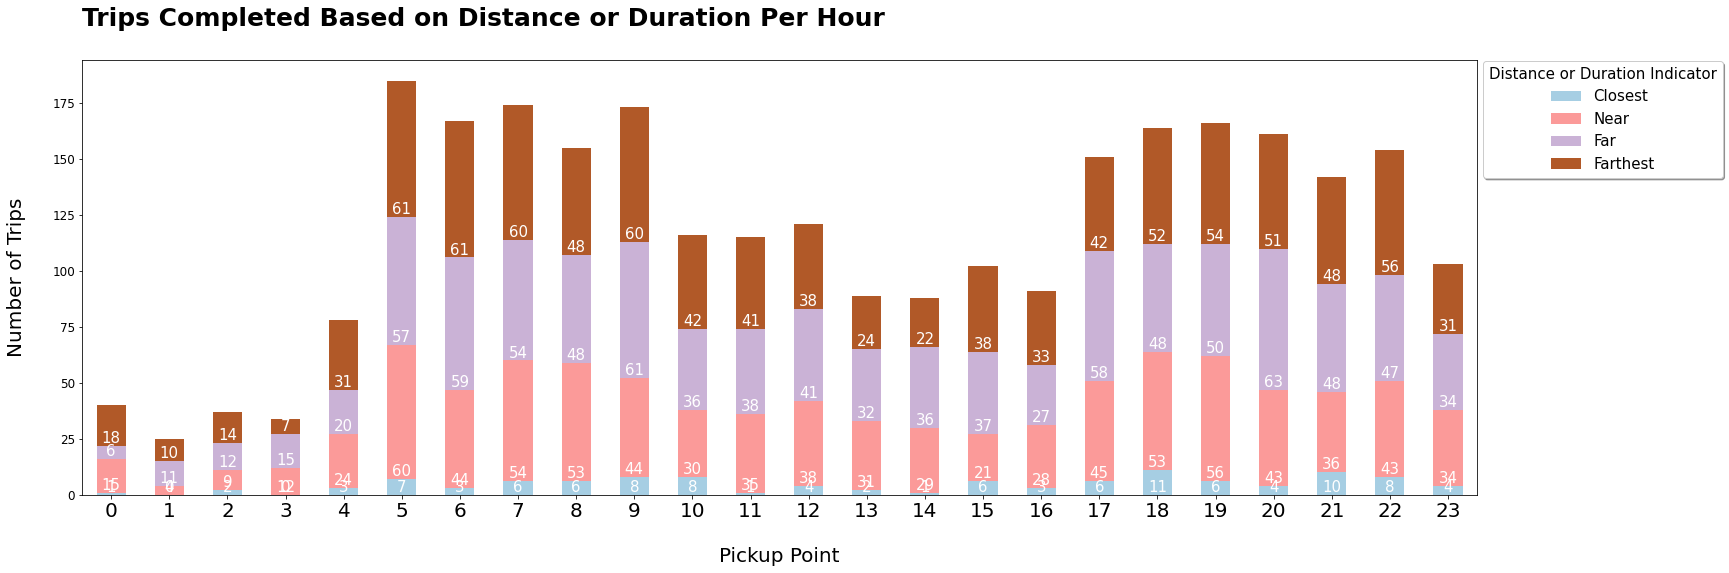

In [81]:
# Now lets create a pivot table to see the number of completed trips from Airport and City and see how many of these fall in each Duration/Distance bucket and do this per hour
res = pd.pivot_table(data=df[~df.Duration.isna()],index="RequestHour",columns="DistanceEstimator",values="Request id",aggfunc="count").plot(kind="bar",figsize=[25,8],stacked=True,colormap="Paired",fontsize=12)
plt.title("Trips Completed Based on Distance or Duration Per Hour\n",fontsize=25,fontweight="bold",loc="left")
plt.xlabel("\nPickup Point",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20,rotation=0)
plt.ylabel("Number of Trips\n",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20)
lgd = plt.legend(title='Distance or Duration Indicator',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.09, 1.015), shadow=True, ncol=1, labels=["Closest","Near","Far","Farthest"],fontsize=15)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=15,color="w")
plt.savefig("17 - Trips Completed Based on Distance or Duration Per Hour.jpeg",dpi=400,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [82]:
# We can also use the describe method to analyse the completed number of trips in each bucket.
pd.pivot_table(data=df[~df.Duration.isna()],index="RequestHour",columns="DistanceEstimator",values="Request id",aggfunc="count").describe()

DistanceEstimator,01 Closest,02 Near,03 Far,04 Farthest
count,22.00000,24.000000,24.000000,24.000000
mean,5.00000,35.041667,39.083333,39.250000
std,2.91139,15.442683,16.916461,16.772778
min,1.00000,4.000000,6.000000,7.000000
25%,3.00000,27.000000,30.750000,29.250000
50%,5.00000,35.500000,39.500000,41.500000
75%,6.75000,44.250000,51.000000,52.500000
max,11.00000,60.000000,63.000000,61.000000


#### <font color="orange">Another bar graph plotted with Duration Indicator as the major axis</font>
#### <font color="blue">Just confirming the same observation, that the shortest duration trips are found to be less compared to other durations</font>
#### <font color="blue">This could also mean for most trips the duration is no longer, which could indicate that traffic is high and during peak hours results in cancellations</font>

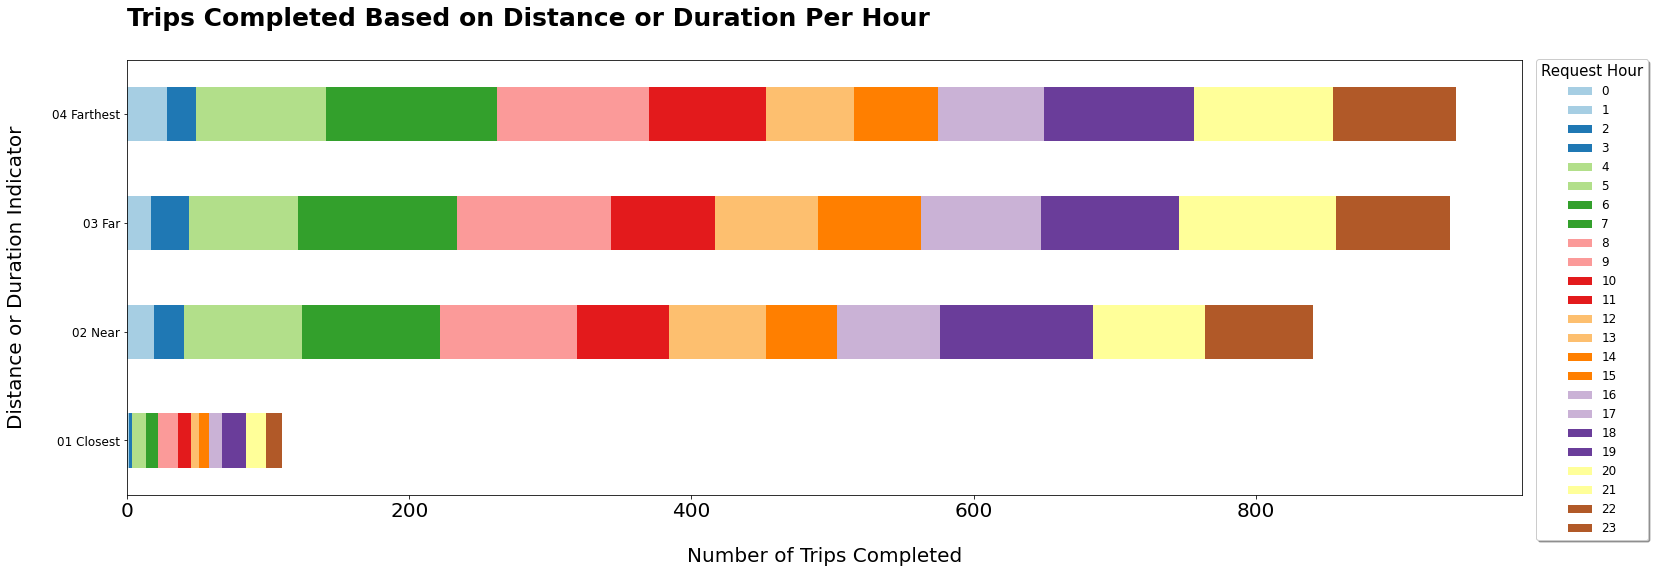

In [83]:
# We can also plot this chart with bars being for Duration/Distance Estimator
res = pd.pivot_table(data=df[~df.Duration.isna()],index="DistanceEstimator",columns="RequestHour",values="Request id",aggfunc="count").plot(kind="barh",figsize=[25,8],stacked=True,colormap="Paired",fontsize=12)
plt.title("Trips Completed Based on Distance or Duration Per Hour\n",fontsize=25,fontweight="bold",loc="left")
plt.xlabel("\nNumber of Trips Completed",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20,rotation=0)
plt.ylabel("Distance or Duration Indicator\n",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20)
lgd = plt.legend(title='Request Hour',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.05, 1.015), shadow=True, ncol=1, labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],fontsize=12)
plt.savefig("18 - Trips Completed Based on Distance or Duration Per Hour - 2.jpeg",dpi=400,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#### <font color="orange">Analyzing the number of trips completing in the same hour</font>
#### <font color="blue">Thus enabling us to understand, how many drivers are actually already servicing a request and hence cannot accept a request at this time</font>

In [84]:
# Lets add a column SameHour to determine all the trips ended in the same hour
df["SameHour"] = pd.NA
df["SameHour"][df.RequestHour == df.DropHour] = "Yes"
df["SameHour"][~(df.RequestHour == df.DropHour)] = "No"
df["SameHour"].value_counts(dropna=False)

NaN    3914
No     2346
Yes     485
Name: SameHour, dtype: int64

In [85]:
# Let's look at a pivot table to see the spread of these requests that completed in the same hour as they started and see their distribution for Airport and City
pd.pivot_table(data=df,index=["RequestHour"],columns=["Pickup point","SameHour"],values="Request id",aggfunc="count")

Pickup point Airport     City    
SameHour          No Yes   No Yes
RequestHour                      
0                 16   7   11   6
1                 11   2    8   4
2                 15   1   17   4
3                 12   3   14   5
4                 33   3   40   2
5                 71  14   86  14
6                 69  12   73  13
7                 59  16   86  13
8                 53  14   73  15
9                 63  11   84  15
10                42  11   47  16
11                43   6   54  12
12                56   7   45  13
13                27   8   44  10
14                29   8   44   7
15                44   8   44   6
16                31   7   45   8
17                64  10   66  11
18                63  18   68  15
19                70  13   63  20
20                59  15   74  13
21                50  11   66  15
22                66  14   59  15
23                54   8   35   6

#### <font color="orange">Bar graph explaining with a Yes or No for Same Hour trips from both Airport and City</font>

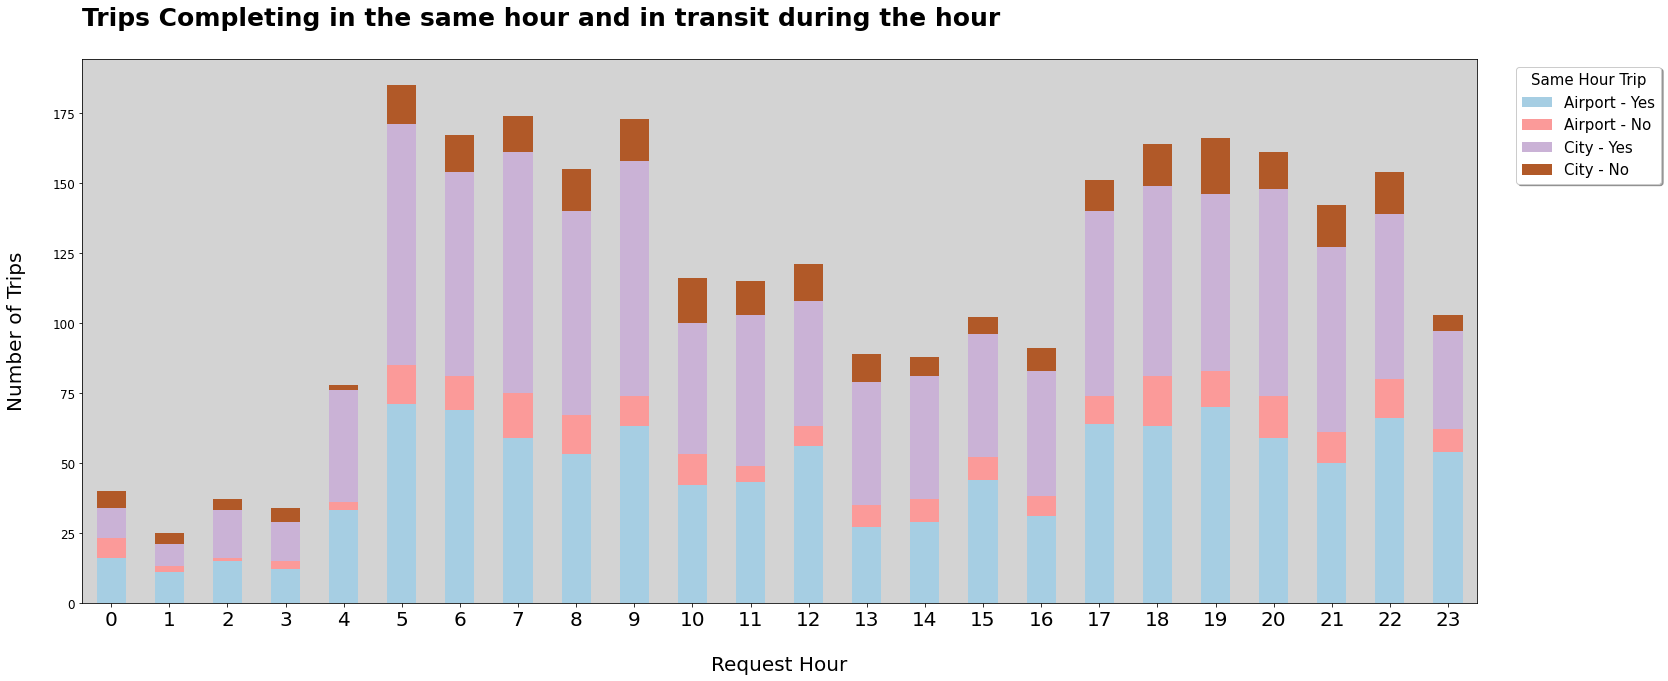

In [86]:
# Let create a bar chart to understand Trips completing in the same hour and number of trips in transit per hour
res=pd.pivot_table(data=df,index=["RequestHour"],columns=["Pickup point","SameHour"],values="Request id",aggfunc="count").plot(kind="bar",figsize=[25,10],stacked=True,colormap="Paired",fontsize=12)
res.set_facecolor('lightgray')
plt.title("Trips Completing in the same hour and in transit during the hour\n",fontsize=25,fontweight="bold",loc="left")
plt.xlabel("\nRequest Hour",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=12,rotation=0)
plt.ylabel("Number of Trips\n",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20)
lgd = plt.legend(title='Same Hour Trip',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.08, 1), shadow=True, ncol=1, labels=["Airport - Yes","Airport - No", "City - Yes","City - No"],fontsize=15)
plt.savefig("19 - Trips completing in the same hour and number of trips in transit per hour.jpeg",dpi=400,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#### <font color="blue">Now whereever we see that we have Pink and brown color (meaning the trip didnt complete in the same hour), means that the driver was already serving a trip, so cannot be available to accept another request even if there is demand</font>

# <font color="orange">Merging the df and sorted_df dataframes to form one final dataframe - uber_final</font>

In [87]:
# Performing a Join on the 2 dataframes we have been working on.
uber_final = df.merge(sorted_df,on="Request id",how="left")

In [88]:
uber_final.head()

,Request id,Pickup point_x,Driver id_x,Status,Request timestamp_x,Drop timestamp,RequestYear,RequestMonth,DropYear,DropMonth,...,Duration_next,TimePeriod_y,TimePeriod_next,RequestHour_y,RequestHour_next,RequestDay_y,RequestDay_next,RequestDate_y,RequestDay_next,Waiting
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7,...,50.0,02 Morning,04 Early Evening,11.0,17,Monday,Monday,2016-07-11,Monday,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7,...,41.0,04 Early Evening,02 Morning,17.0,9,Monday,Tuesday,2016-07-11,Tuesday,Waiting
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7,...,55.0,02 Morning,06 Night,9.0,21,Tuesday,Tuesday,2016-07-12,Tuesday,Waiting
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7,...,52.516667,06 Night,02 Morning,21.0,8,Tuesday,Wednesday,2016-07-12,Wednesday,Waiting
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7,...,31.516667,02 Morning,06 Night,8.0,21,Wednesday,Wednesday,2016-07-13,Wednesday,Waiting


In [89]:
# Lets get rid of duplicate columns
uber_final = uber_final[[x for x in uber_final.columns.to_list() if not x.endswith(("_x","_y"))] + [x for x in uber_final.columns.to_list() if x.endswith(("_x"))]]

for col in uber_final.columns.to_list():
    if col.endswith("_x"):
        print(col,col[0:-2])
        uber_final.rename(columns={col:col[0:-2]},inplace=True)

Pickup point_x Pickup point
Driver id_x Driver id
Request timestamp_x Request timestamp
Duration_x Duration
RequestDate_x RequestDate
RequestDay_x RequestDay
TimePeriod_x TimePeriod
RequestHour_x RequestHour


In [90]:
uber_final.head()

,Request id,Status,Drop timestamp,RequestYear,RequestMonth,DropYear,DropMonth,SameDay,DropDate,DropDay,...,RequestDay_next,Waiting,Pickup point,Driver id,Request timestamp,Duration,RequestDate,RequestDay,TimePeriod,RequestHour
0,619,Trip Completed,2016-07-11 13:00:00,2016,7,2016,7,Yes,2016-07-11,Monday,...,Monday,0,Airport,1.0,2016-07-11 11:51:00,69.0,2016-07-11,Monday,02 Morning,11
1,867,Trip Completed,2016-07-11 18:47:00,2016,7,2016,7,Yes,2016-07-11,Monday,...,Tuesday,Waiting,Airport,1.0,2016-07-11 17:57:00,50.0,2016-07-11,Monday,04 Early Evening,17
2,1807,Trip Completed,2016-07-12 09:58:00,2016,7,2016,7,Yes,2016-07-12,Tuesday,...,Tuesday,Waiting,City,1.0,2016-07-12 09:17:00,41.0,2016-07-12,Tuesday,02 Morning,9
3,2532,Trip Completed,2016-07-12 22:03:00,2016,7,2016,7,Yes,2016-07-12,Tuesday,...,Wednesday,Waiting,Airport,1.0,2016-07-12 21:08:00,55.0,2016-07-12,Tuesday,06 Night,21
4,3112,Trip Completed,2016-07-13 09:25:47,2016,7,2016,7,Yes,2016-07-13,Wednesday,...,Wednesday,Waiting,City,1.0,2016-07-13 08:33:16,52.516667,2016-07-13,Wednesday,02 Morning,8


#### <font color="orange">Rearranging columns in uber_final</font>

In [91]:
# Let's rearrange all the columns to make the dataframe more readable
uber_final = uber_final[["Request id", "Driver id", "Status", "Request timestamp", "Drop timestamp", "Request timestamp_next", "Pickup point", "Pickup point_next", "RequestHour", "DropHour", "Duration", "SameDay", "SameHour", "Waiting", "TimePeriod", "RequestTime", "RequestYear", "DropYear", "RequestMonth", "DropMonth", "RequestDate", "DropDate", "RequestDay", "DropDay", "DistanceEstimator", "Driver id_next",  "RequestDay_next", "RequestHour_next", "Duration_next", "TimePeriod_next"]]

In [92]:
uber_final.head()

,Request id,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp_next,Pickup point,Pickup point_next,RequestHour,DropHour,...,DropDay,DistanceEstimator,Driver id_next,RequestDay_next,RequestDay_next,RequestDay_next,RequestDay_next,RequestHour_next,Duration_next,TimePeriod_next
0,619,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11 17:57:00,Airport,Airport,11,13,...,Monday,04 Farthest,1.0,Monday,Monday,Monday,Monday,17,50.0,04 Early Evening
1,867,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-12 09:17:00,Airport,City,17,18,...,Monday,03 Far,1.0,Tuesday,Tuesday,Tuesday,Tuesday,9,41.0,02 Morning
2,1807,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12 21:08:00,City,Airport,9,9,...,Tuesday,02 Near,1.0,Tuesday,Tuesday,Tuesday,Tuesday,21,55.0,06 Night
3,2532,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-13 08:33:16,Airport,City,21,22,...,Tuesday,03 Far,1.0,Wednesday,Wednesday,Wednesday,Wednesday,8,52.516667,02 Morning
4,3112,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13 21:57:28,City,Airport,8,9,...,Wednesday,03 Far,1.0,Wednesday,Wednesday,Wednesday,Wednesday,21,31.516667,06 Night


#### <font color="orange">Analysing the number of requests drivers tend to cancel</font>
#### <font color="blue">Some outliers here that some drivers have cancelled all their trips, hence have 100% cancellation and do not like work on this route</font>

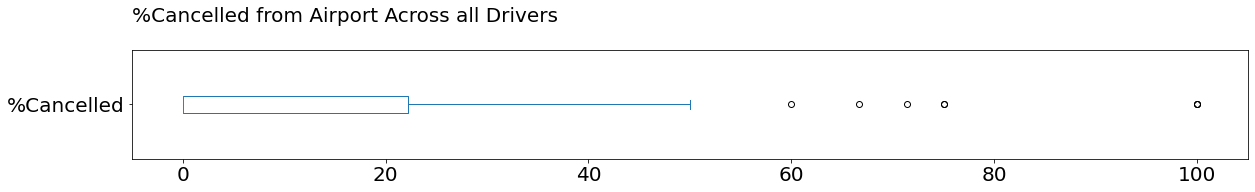

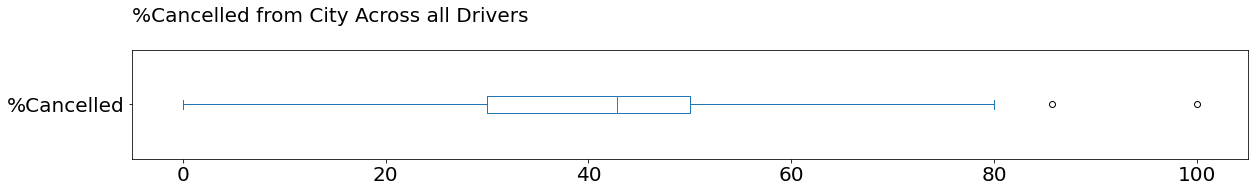

In [93]:
# Let's look at all the Drivers and how many requests they are cancelling
driver_performance_Airport = pd.pivot_table(data=df[df["Pickup point"] == "Airport"],index=["Driver id"],columns="Status",values="Request id",aggfunc="count",margins=True,margins_name="All").reset_index()
driver_performance_Airport.fillna(0,inplace=True)
driver_performance_Airport["%Cancelled"] = 100*driver_performance_Airport.Cancelled/driver_performance_Airport.All
driver_performance_Airport[["Driver id","%Cancelled"]].sort_values(by="%Cancelled",ascending=False).plot(kind="box",vert=False,figsize=[20,2],fontsize=20)
plt.title("%Cancelled from Airport Across all Drivers\n",fontsize=20,loc="left")
plt.savefig("20 - %Cancelled trips from Airport across all Drivers.jpeg",dpi=400, bbox_inches='tight')
plt.show()
driver_performance_City = pd.pivot_table(data=df[df["Pickup point"] == "City"],index=["Driver id"],columns="Status",values="Request id",aggfunc="count",margins=True,margins_name="All").reset_index()
driver_performance_City.fillna(0,inplace=True)
driver_performance_City["%Cancelled"] = 100*driver_performance_City.Cancelled/driver_performance_City.All
driver_performance_City[["Driver id","%Cancelled"]].sort_values(by="%Cancelled",ascending=False).plot(kind="box",vert=False,figsize=[20,2],fontsize=20)
plt.title("%Cancelled from City Across all Drivers\n",fontsize=20,loc="left")
plt.savefig("21 - %Cancelled trips from City across all Drivers.jpeg",dpi=400, bbox_inches='tight')
plt.show()

#### <font color="orange">Creating a pivot table - supply_demand_gap_airport to plot a graph on success vs failure </font>

In [94]:
# We saw that some drivers were nto accepting requests at all on this route and had 100% cancellation
# So lets look at the Supply demand gap more closely than we have before.
# Lets first look at the demand supply gap for Airport and creaye a pivot table for it.
supply_demand_gap_Airport = pd.pivot_table(data=uber_final[uber_final["Pickup point"]=="Airport"],index="TimePeriod",columns="Status",values="Request id",aggfunc="count",margins=True,margins_name="TotalRequests")
supply_demand_gap_Airport.head()
supply_demand_gap_Airport["Failed"] = supply_demand_gap_Airport["Cancelled"] + supply_demand_gap_Airport["No Cars Available"]
supply_demand_gap_Airport.head()
supply_demand_gap_Airport.drop(columns=["Cancelled","No Cars Available"],inplace=True)
supply_demand_gap_Airport.head()
supply_demand_gap_Airport["%Successful"] = 100*supply_demand_gap_Airport["Trip Completed"]/supply_demand_gap_Airport.TotalRequests
supply_demand_gap_Airport["%Failed"] = 100*supply_demand_gap_Airport["Failed"]/supply_demand_gap_Airport.TotalRequests
supply_demand_gap_Airport.drop(columns=["Trip Completed","TotalRequests","Failed"],inplace=True)
supply_demand_gap_Airport.head()

Status,%Successful,%Failed
TimePeriod,,
01 Early Morning,79.841897,20.158103
02 Morning,82.812500,17.187500
03 Afternoon,67.266187,32.733813
04 Early Evening,30.352304,69.647696
05 Evening,21.271077,78.728923


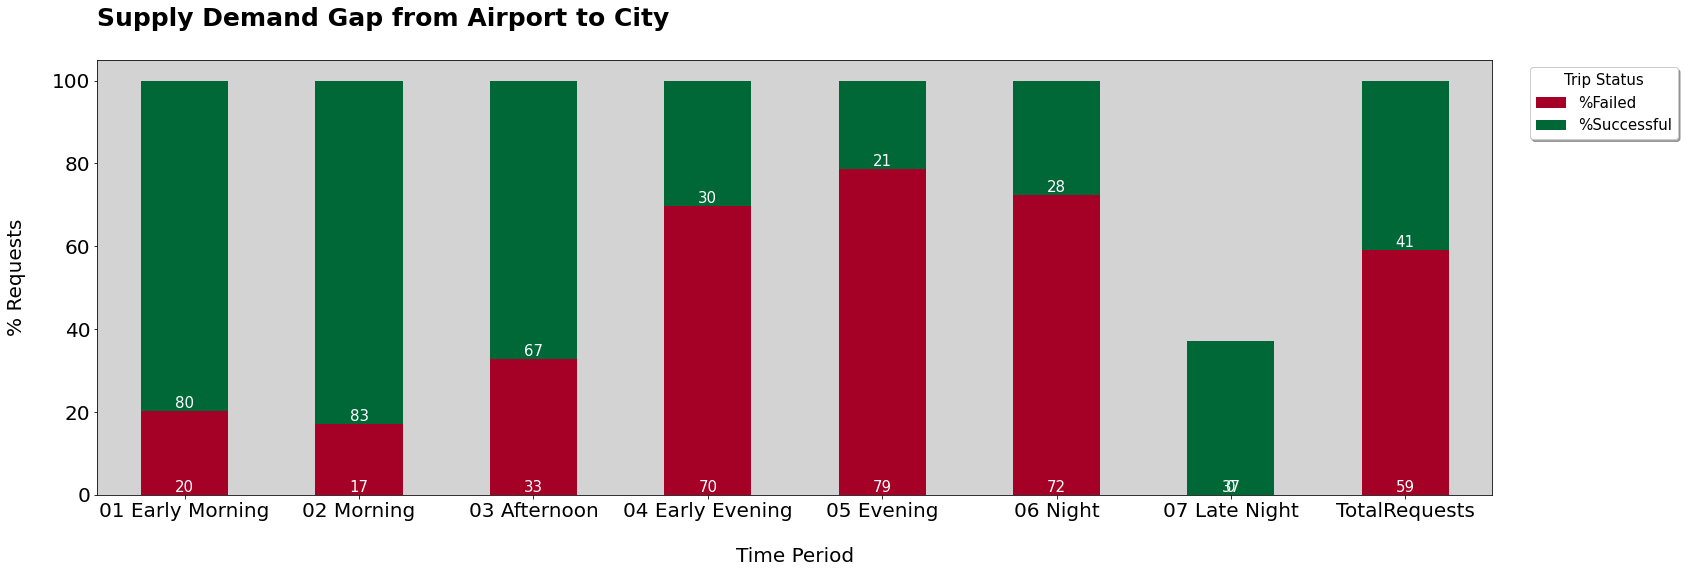

In [95]:
# Lets first look at the demand supply gap for Airport and create a bar chart for it.
res = supply_demand_gap_Airport[["%Failed","%Successful"]].plot(kind="bar",figsize=[25,8],stacked=True,colormap="RdYlGn",fontsize=12)
res.set_facecolor('lightgray')
plt.title("Supply Demand Gap from Airport to City\n",fontsize=25,fontweight="bold",loc="left")
plt.xlabel("\nTime Period",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20,rotation=0)
plt.ylabel("% Requests\n",fontsize=20)
plt.setp(res.yaxis.get_majorticklabels(),fontsize=20)
lgd = plt.legend(title='Trip Status',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.08, 1), shadow=True, ncol=1, labels=["%Failed","%Successful"],fontsize=15)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=15,color="w")
plt.savefig("22 - Supply Demand Gap from Airport to City.jpeg",dpi=400,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [96]:
# Lets first look at the demand supply gap for City and create a pivot table for it.
supply_demand_gap_City = pd.pivot_table(data=uber_final[uber_final["Pickup point"]=="City"],index="TimePeriod",columns="Status",values="Request id",aggfunc="count",margins=True,margins_name="TotalRequests")
supply_demand_gap_City.head()
supply_demand_gap_City["Failed"] = supply_demand_gap_City["Cancelled"] + supply_demand_gap_City["No Cars Available"]
supply_demand_gap_City.head()
supply_demand_gap_City.drop(columns=["Cancelled","No Cars Available"],inplace=True)
supply_demand_gap_City.head()
supply_demand_gap_City["%Successful"] = 100*supply_demand_gap_City["Trip Completed"]/supply_demand_gap_City.TotalRequests
supply_demand_gap_City["%Failed"] = 100*supply_demand_gap_City["Failed"]/supply_demand_gap_City.TotalRequests
supply_demand_gap_City.drop(columns=["Trip Completed","TotalRequests","Failed"],inplace=True)
supply_demand_gap_City.head()

Status,%Successful,%Failed
TimePeriod,,
01 Early Morning,28.751576,71.248424
02 Morning,32.170543,67.829457
03 Afternoon,57.104558,42.895442
04 Early Evening,62.500000,37.500000
05 Evening,78.301887,21.698113


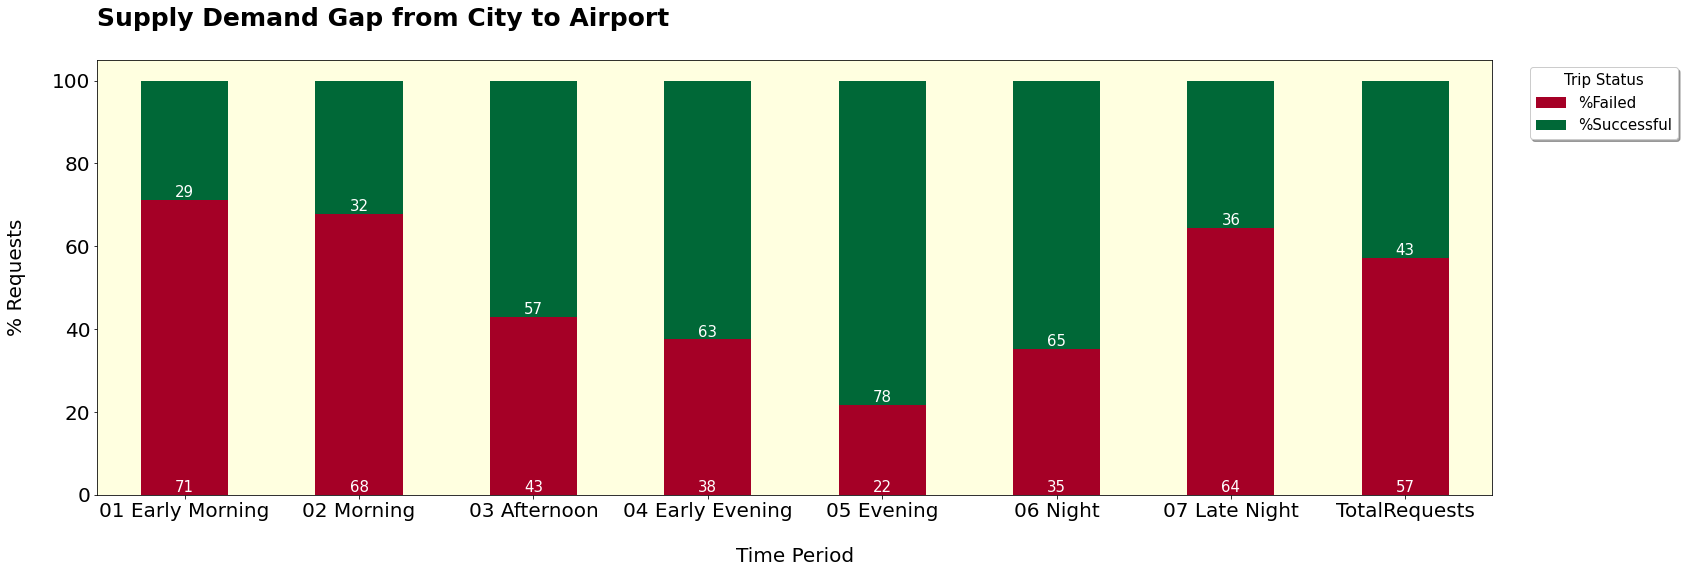

In [97]:
# Lets first look at the demand supply gap for City and create a bar chart for it.
res = supply_demand_gap_City[["%Failed","%Successful"]].plot(kind="bar",figsize=[25,8],stacked=True,colormap="RdYlGn",fontsize=12)
res.set_facecolor('lightyellow')
plt.title("Supply Demand Gap from City to Airport\n",fontsize=25,fontweight="bold",loc="left")
plt.xlabel("\nTime Period",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20,rotation=0)
plt.ylabel("% Requests\n",fontsize=20)
plt.setp(res.yaxis.get_majorticklabels(),fontsize=20)
lgd = plt.legend(title='Trip Status',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.08, 1), shadow=True, ncol=1, labels=["%Failed","%Successful"],fontsize=15)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=15,color="w")
plt.savefig("23 - Supply Demand Gap from City to Airport.jpeg",dpi=400,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

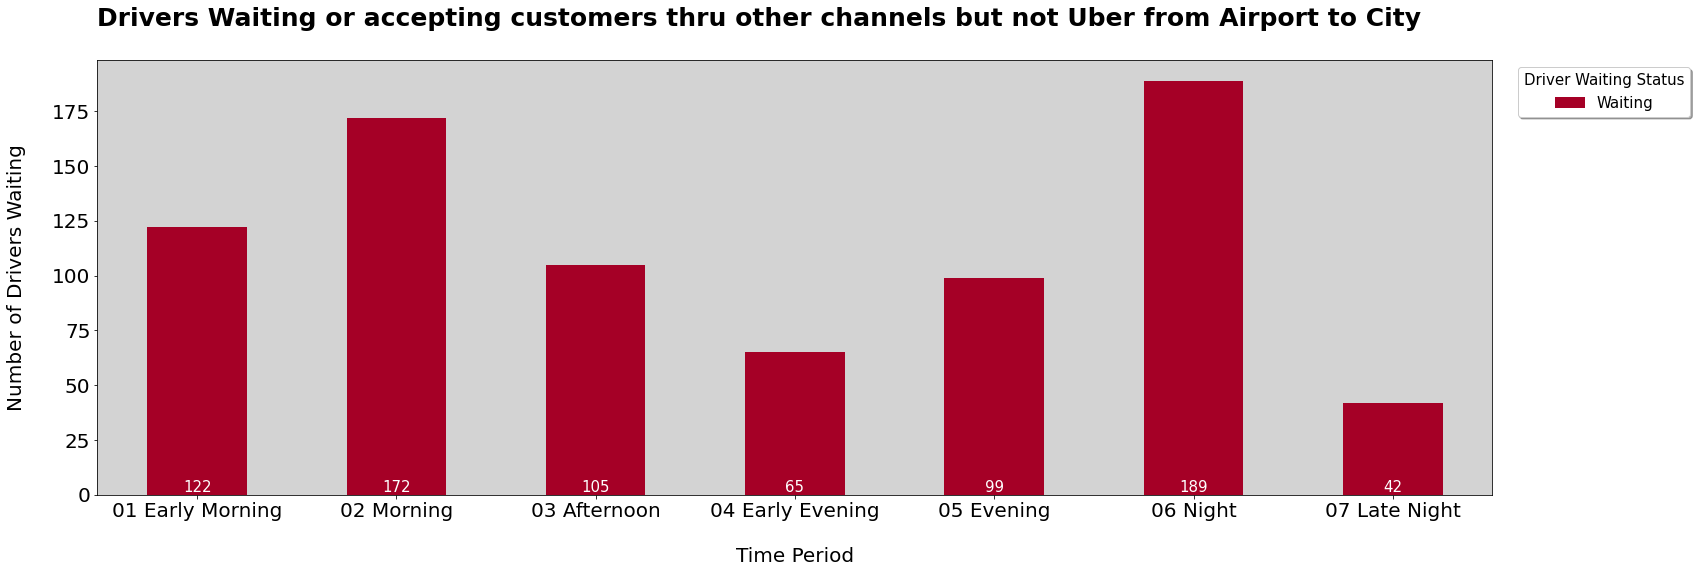

In [98]:
# Lets bring back the drivers chart back and we see that the demand is there but not being fullfilled.
pd.pivot_table(data=uber_final[(uber_final["Pickup point"]=="Airport") & (uber_final["Waiting"]=="Waiting")],index="TimePeriod",columns="Waiting",values="Driver id",aggfunc="count")
res = pd.pivot_table(data=uber_final[(uber_final["Pickup point"]=="Airport") & (uber_final["Waiting"]=="Waiting")],index="TimePeriod",columns="Waiting",values="Driver id",aggfunc="count").plot(kind="bar",figsize=[25,8],stacked=True,colormap="RdYlGn",fontsize=12)
res.set_facecolor('lightgray')
plt.title("Drivers Waiting or accepting customers thru other channels but not Uber from Airport to City\n",fontsize=25,fontweight="bold",loc="left")
plt.xlabel("\nTime Period",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20,rotation=0)
plt.ylabel("Number of Drivers Waiting\n",fontsize=20)
plt.setp(res.yaxis.get_majorticklabels(),fontsize=20)
lgd = plt.legend(title='Driver Waiting Status',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.08, 1), shadow=True, ncol=1, labels=["Waiting"],fontsize=15)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=15,color="w")
plt.savefig("24 - Drivers Waiting or accepting customers thru other channels but not Uber from Airport to City.jpeg",dpi=400,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

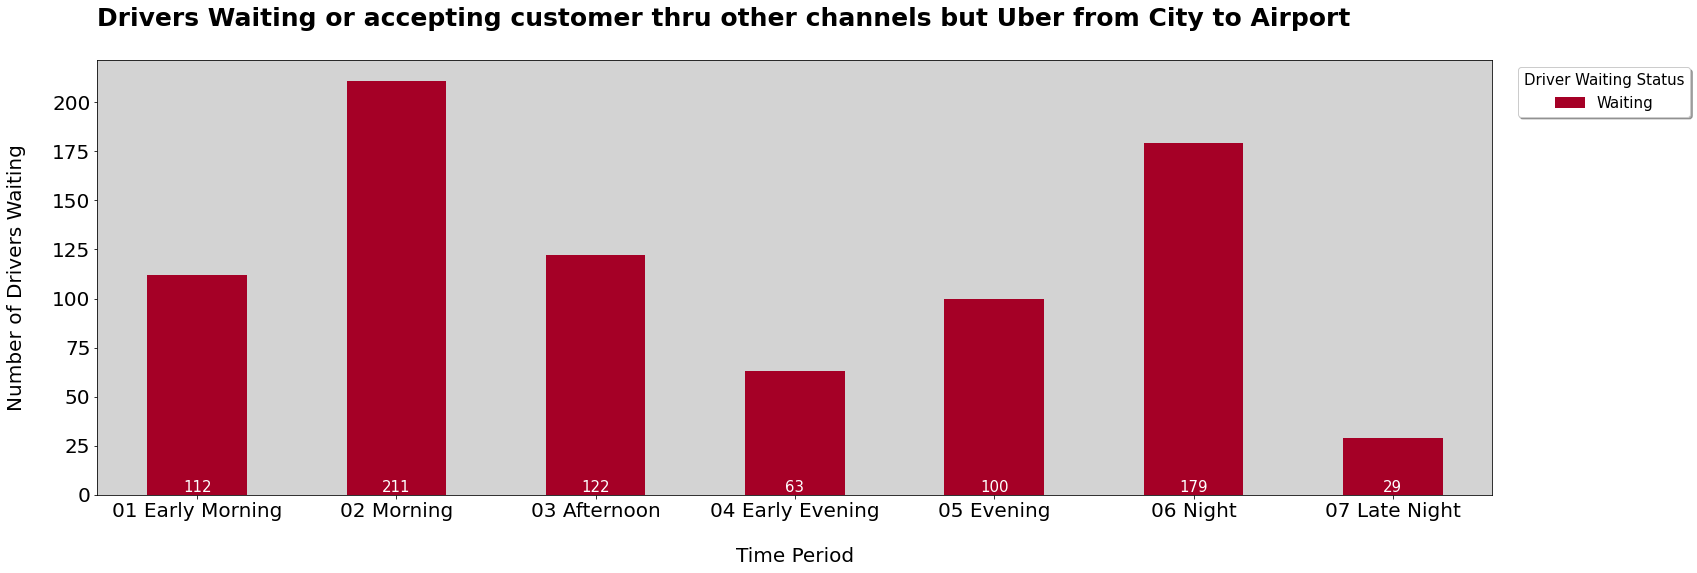

In [99]:
# Lets bring back the drivers chart back and we see that the demand is there but not being fullfilled.
pd.pivot_table(data=uber_final[(uber_final["Pickup point"]=="City") & (uber_final["Waiting"]=="Waiting")],index="TimePeriod",columns="Waiting",values="Driver id",aggfunc="count")
res = pd.pivot_table(data=uber_final[(uber_final["Pickup point"]=="City") & (uber_final["Waiting"]=="Waiting")],index="TimePeriod",columns="Waiting",values="Driver id",aggfunc="count").plot(kind="bar",figsize=[25,8],stacked=True,colormap="RdYlGn",fontsize=12)
res.set_facecolor('lightgray')
plt.title("Drivers Waiting or accepting customer thru other channels but Uber from City to Airport\n",fontsize=25,fontweight="bold",loc="left")
plt.xlabel("\nTime Period",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20,rotation=0)
plt.ylabel("Number of Drivers Waiting\n",fontsize=20)
plt.setp(res.yaxis.get_majorticklabels(),fontsize=20)
lgd = plt.legend(title='Driver Waiting Status',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.08, 1), shadow=True, ncol=1, labels=["Waiting"],fontsize=15)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=15,color="w")
plt.savefig("25 - Drivers Waiting or accepting customers thru other channels but not Uber from City to Aiport.jpeg",dpi=400,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

# <font color="blue">Observations</font>

### <font color="blue">Observation 1 - Trips requests from the City has higher number of cancellations compared to the one's starting from the Airport</font>
### <font color="blue">Observation 2 - Trips requests from the Airport register higher number of No Car Availability compared to the one's requested from the City</font>
### <font color="blue">Observation 3 - Successful trips originating is slightly higher from the City compared to the Airport </font>
### <font color="blue">Observation 4 - Number of Trips Requests is higher from the Airport during the Early Mornings(4-6 AM) and Mornings(7-11 AM) </font>
### <font color="blue">Observation 5 - Number of Trips Requests is higher from the City during the Evenings(5-6 PM) and Night(7 PM - Midnight) </font>

### <font color="blue">Observation 6 - The cancellation and Car Availability pattern is almost the same each day, with no specific day standing out for trips from Airport</font>
### <font color="blue">This basically means that there are free drivers and cars available at this  time but are either cancelling the requests or not taking any requests for some reason</font>
### <font color="blue">The cancellation and Car Availability pattern is almost the same each day, with no specific day standing out for trips from City</font>
### <font color="blue">Observation 8 – The heaviest load was during the 5th hour of the day during the week. This time period has total successful requests of only 185. The total number of Drivers is 300.</font>
### <font color="blue">Observation 9 – Trip Requests are higher from the Airport in the evening time and most of the requests do not get serviced with “No Cars Available” as the primary reason. Not as many cancellations at this time. But significantly higher number of failed requests (Cancelled/No Cars Available)</font>
### <font color="blue">Observation 10 –Trip Requests are higher from the City in the morning time and most of the requests do not get serviced with “Cancellation” as the primary reason. Requests not being serviced for “No Cars Available” is nearly half of the requests failing for the reason being “Cancellation”</font>

### <font color="blue">Observation 11 – From the above visualizations, we can see that the number of cars is not available between 7 am to 2 pm in the city and the airport between 5 pm to 8pm.No. of cancelled cabs in the city are happening from 6 to 9 am and in the airport between 1 to 8 pm</font>
### <font color="blue">This basically means that if we assume that if 104 drivers would have accepted to service these trips, the demand would have still fallen short of supply and about 242/5 ~ 50 requests/day would still go un-serviced.</font>
### <font color="blue">Observation 12 - There were 346 failed trip Requests during the 18th hour. During the same hour, there were about 104 Drivers waiting for the next trip but were probably cancelling the requests or preferred to service customers not through Uber.</font>
### <font color="blue">Observation 13 – This basically means that if we assume that if 104 drivers would have accepted to service these trips, the demand would have still fallen short of supply and about 242/5 ~ 50 requests/day would still go un-serviced.</font>
### <font color="blue">Observation 14 – Most trips get completed in the same hour as they were requested. </font>
### <font color="blue">May be the requests that get cancelled are for 1 other reason and that being the distance of the trip.</font>
### <font color="blue">Observation 15 – There are a few drivers who have a cancellation rate of 100%, meaning they don’t want to travel on this route at all.</font>

### <font color="blue">Observation 16 – About 40 drivers are in transit in between hours, so they are not available to take requests either.</font>
### <font color="blue">Uber may need to register more number of drivers to fill this gap.Also provide some form of added benefit to the drivers to accept these requests.</font>
### <font color="blue">May be the requests that get cancelled are for 1 other reason and that being the distance of the trip. </font>
### <font color="blue">Observation 17 - Almost all trips getting completed are longer than 30 minutes.</font>
### <font color="blue">Observation 18 - Trip requests with durations greater than 45 minutes and 60 minutes have almost the same number of count.</font>

# <font color="black"> Recommendations </font>

#### <font color="black"> 1. There are drivers but are not accepting requests on Uber platform. To solve this, we may incentivize them for accepting requests during the peak periods. </font>
#### <font color="black"> 2. Even if the drivers started accepting requests, there will be a gap, as there are only 300 drivers divided for trips from Airport and City. Uber needs to register a greater number of drivers to fill this gap. Run a campaign/ad to register a greater number of drivers with Uber. Provide sign-up bonus to new drivers.</font>
#### <font color="black"> 3. Most trips completed are above 30 minutes duration. It is possible the shorter trips are not getting accepted or are being cancelled as the drivers feel there isn’t enough advantage for them, and they lose more fuel, plus lose long-distance customers at the same time. Penalize drivers for excessive cancellations. Some drivers have 100% cancellation rate, meaning they cancel all trips once they find out its not in their benefit.</font>
#### <font color="black"> 4. Bonus to drivers who maintain a high rate of non-cancellation. Work with such drivers more and ask them for referrals and provide further incentives to such drivers. </font>
#### <font color="black"> 5. Some requests may also be getting cancelled for locations that tend to have high traffic. Charge customers higher during this period and pass on that extra money to the drivers.</font>
#### <font color="black"> 6. Some drivers seem to accepting customers thru other channels. They may be working with customers directly because then they can charge higher price. They may be registered to other Uber competitors as well. Conduct survey to understand how many drivers are working with Uber competitors as well.</font>